# Projekt 1 z przedmiotu DS&CC
Przeanalizowanie zbioru danych, dotyczących wynajmu lokali poprzez platformę **Airbnb**.
W moim przypadku wykorzystane są dane dla miasta ***Neapol, Kampania, Włochy***.

### Krok 0 - Importowanie niezbędnych modułów do dalszej pracy

In [1]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt

### Krok 1 - Załadowanie
Poprawne załadowanie danych ze źródła internetowego do ramki danych (*DataFrame*).

In [2]:
# Warto także pamiętać o poprawnym wpisaniu adresu URL
url = "http://data.insideairbnb.com/italy/campania/naples/2023-09-13/data/listings.csv.gz"

Jak można zauważyć na stronie z danymi oraz w adresie URL, plik z danymi CSV jest pobierany w formacie `.gz`.
Żeby poprawnie wczytać i rozpakować dane, używam parametru `compression='gzip'`. Do określenia kodowania danych używam parametru `encoding='utf-8'`. Jednak w tym przypadku wystarczy wykorzystanie funkcji domyślnej bezargumentowej. Pandas automatycznie wykrywa nagłówki, jeżeli dane ich zawierają.

In [3]:
df = pd.read_csv(url)

# zaladowanie z okreslonymi parametrami
# df = pd.read_csv(url, compression='gzip', encoding='utf-8')

### Krok 2 - Poznanie
Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują) i oszacowanie czasochłonności procesu analizy.

Za pomocą funkcji `df.shape` można dostać krotkę reprezentującą wymiarowość ramki ***DataFrame***.

In [4]:
df.shape

(9754, 75)

W przypadku tego zbioru danych dostałem dwuelementową krotkę, w której *0*-wy element reprezentuje wierszy (liczba obserwacji) i *1*-szy element reprezentuje kolumny (liczba zmiennych). 

Prostymi poleceniami poznaję liczbę obserwacji, liczbę zmiennych oraz całkowity rozmiar zbioru danych:

In [5]:
liczba_obserwacji = df.shape[0]
liczba_zmiennych = df.shape[1]
print("Liczba obserwacji:", liczba_obserwacji, "\nLiczba zmiennych:", liczba_zmiennych)

rozmiar_zbioru = df.size
print("\nRozmiar zbioru danych:", rozmiar_zbioru)

df.info()

Liczba obserwacji: 9754 
Liczba zmiennych: 75

Rozmiar zbioru danych: 731550
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9754 entries, 0 to 9753
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9754 non-null   int64  
 1   listing_url                                   9754 non-null   object 
 2   scrape_id                                     9754 non-null   int64  
 3   last_scraped                                  9754 non-null   object 
 4   source                                        9754 non-null   object 
 5   name                                          9754 non-null   object 
 6   description                                   9502 non-null   object 
 7   neighborhood_overview                         5755 non-null   object 
 8   picture_url                                   9754 non-null  

### Krok 3 - Wyświetlenie
Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych.

Po pobraniu danych ze źródła należy sprawdzić, czy dane są poprawnie wyświetlane oraz zapoznać się z ich strukturą.

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Krok 4 - Weryfikacja
Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.).

In [7]:
# zmiana wartości str na float
df['host_response_rate'] = df['host_response_rate'].str.replace('[\%]', "", regex=True).astype(float)/100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('[\%]', "", regex=True).astype(float)/100
df['price'] = df['price'].str.replace('[\$,]', "", regex=True).astype(float)

# zmiana wartości str na bool
df.host_is_superhost = df.host_is_superhost.map({'f': False, 't': True})
df.host_has_profile_pic = df.host_has_profile_pic.map({'f': False, 't': True})
df.has_availability = df.has_availability.map({'f': False, 't': True})
df.host_identity_verified = df.host_identity_verified.map({'f': False, 't': True})
df.instant_bookable = df.instant_bookable.map({'f': False, 't': True})

# ustawienie zmiennych kategorycznych
df.host_response_time = df.host_response_time.astype('category')
df.source = df.source.astype('category')
df.host_location = df.host_location.astype('category')
df.property_type = df.property_type.astype('category')
df.room_type = df.room_type.astype('category')
df.neighbourhood = df.neighbourhood.astype('category')
df.neighbourhood_cleansed = df.neighbourhood_cleansed.astype('category')
df.host_neighbourhood = df.host_neighbourhood.astype('category')

# podział stringa na listę wartości
df.host_verifications = df.host_verifications.str[1:-1].replace("[' ]", '', regex=True).str.split(',')

# użycie json.loads do ustawienia wartości kodowanych jsonem
df.amenities = df.amenities.apply(json.loads)

# ustawienie liczby łazienek na typ float
df.bathrooms = df.bathrooms_text.str.replace("-", "0.5").str.replace("[a-zA-Z ]", "", regex=True).astype(float)

# parsing daty
df.host_since = pd.to_datetime(df.host_since)
df.calendar_last_scraped = pd.to_datetime(df.calendar_last_scraped)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)
df.last_scraped = pd.to_datetime(df.last_scraped)

df.describe()

,id,scrape_id,last_scraped,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.754000e+03,9.754000e+03,9754,9.754000e+03,9754,8114.000000,8753.000000,9754.000000,9754.000000,0.0,9754.000000,9754.000000,9754.000000,9744.000000,7012.00000,9672.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,0.0,9754.000000,9754.000000,9754.000000,9754.000000,9754,9754.000000,9754.000000,9754.000000,7815,7815,7815.000000,7791.000000,7792.000000,7791.000000,7793.000000,7791.000000,7792.000000,9754.000000,9754.000000,9754.000000,9754.000000,7815.000000
mean,3.695006e+17,2.023091e+13,2023-09-13 00:00:00,2.298219e+08,2018-07-18 12:50:55.977035264,0.957454,0.885955,11.010970,15.408653,NaN,40.847120,14.249726,3.730777,1.217826,1.48688,2.257858,121.099856,2.443613,466.488005,2.343141,3.811564,662.204531,696.175108,2.754911,677.625272,NaN,9.985442,28.493849,51.187000,217.523067,2023-09-13 00:00:00,36.175210,11.382202,1.168341,2020-10-27 19:39:38.349328384,2023-02-10 23:01:57.466411008,4.687638,4.745646,4.741667,4.802550,4.823823,4.682155,4.644003,7.183514,5.252614,1.799364,0.049313,1.583854
min,3.046600e+04,2.023091e+13,2023-09-13 00:00:00,1.578400e+04,2009-05-04 00:00:00,0.000000,0.000000,1.000000,1.000000,NaN,40.792757,14.156530,1.000000,0.000000,1.00000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,2023-09-13 00:00:00,0.000000,0.000000,0.000000,2010-05-30 00:00:00,2013-03-15 00:00:00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.955400e+07,2.023091e+13,2023-09-13 00:00:00,5.251480e+07,2015-12-28 00:00:00,1.000000,0.930000,1.000000,1.000000,NaN,40.841003,14.244440,2.000000,1.000000,1.00000,1.000000,70.000000,1.000000,30.000000,1.000000,1.000000,99.000000,360.000000,1.000000,120.000000,NaN,2.000000,14.000000,36.000000,108.000000,2023-09-13 00:00:00,1.000000,0.000000,0.000000,2018-10-22 12:00:00,2023-04-24 00:00:00,4.600000,4.680000,4.670000,4.770000,4.810000,4.570000,4.540000,1.000000,1.000000,0.000000,0.000000,0.310000
50%,5.166706e+07,2.023091e+13,2023-09-13 00:00:00,1.917079e+08,2018-05-26 00:00:00,1.000000,1.000000,3.000000,3.000000,NaN,40.848495,14.251350,4.000000,1.000000,1.00000,2.000000,90.000000,2.000000,365.000000,1.000000,2.000000,999.000000,1125.000000,2.000000,999.000000,NaN,8.000000,30.000000,57.000000,254.000000,2023-09-13 00:00:00,7.000000,3.000000,0.000000,2021-10-19 00:00:00,2023-08-14 00:00:00,4.830000,4.870000,4.880000,4.920000,4.950000,4.810000,4.760000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,8.214610e+17,2.023091e+13,2023-09-13 00:00:00,4.178125e+08,2021-08-10 00:00:00,1.000000,1.000000,5.000000,6.000000,NaN,40.853550,14.261077,4.000000,1.000000,2.00000,3.000000,130.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,2.000000,1125.000000,NaN,16.000000,43.000000,72.000000,333.000000,2023-09-13 00:00:00,38.000000,15.000000,2.000000,2023-03-04 00:00:00,2023-09-03 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,4.980000,4.910000,4.000000,2.000000,

### Krok 5 - Podsumowanie
Zbudowanie podsumowania zmiennych **numerycznych** opisujących zbiór, w postaci jednej tabelki, zawierającej podstawowe informacje:

In [8]:
desc_num = df.select_dtypes(include="number")                                               # wybranie tylko wartości numerycznych
desc_num = desc_num.describe()                                                              # opis podstawowych parametrów wybranych danych
desc_num = desc_num._append(desc_num.median(numeric_only=True).rename("median"))            # dodanie do tabeli mediany
desc_num = desc_num._append(desc_num.isna().sum().rename("missing"))                        # dodanie do tabeli ilości brakującyh danych

# desc_num = pd.concat([desc_num, desc_num.median(numeric_only=True).rename("median")])     # dodanie do tabeli mediany
# desc_num = pd.concat([desc_num, desc_num.isna().sum().rename("missing")])                 # dodanie do tabeli ilości brakującyh danych

desc_num

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.754000e+03,9.754000e+03,9.754000e+03,8114.000000,8753.000000,9754.000000,9754.000000,0.0,9754.000000,9754.000000,9754.000000,9744.000000,7012.00000,9672.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,0.0,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,7815.000000,7791.000000,7792.000000,7791.000000,7793.000000,7791.000000,7792.000000,9754.000000,9754.000000,9754.000000,9754.000000,7815.000000
mean,3.695006e+17,2.023091e+13,2.298219e+08,0.957454,0.885955,11.010970,15.408653,NaN,40.847120,14.249726,3.730777,1.217826,1.48688,2.257858,121.099856,2.443613,466.488005,2.343141,3.811564,662.204531,696.175108,2.754911,677.625272,NaN,9.985442,28.493849,51.187000,217.523067,36.175210,11.382202,1.168341,4.687638,4.745646,4.741667,4.802550,4.823823,4.682155,4.644003,7.183514,5.252614,1.799364,0.049313,1.583854
std,4.122564e+17,0.000000e+00,1.816247e+08,0.154508,0.246233,40.895921,77.937893,NaN,0.010890,0.019162,1.977548,0.561465,0.80327,1.576338,180.164366,19.305074,465.965244,19.227575,21.891916,485.935172,477.795743,19.485091,477.107166,NaN,8.588702,18.132203,27.003174,123.220453,68.328796,18.570405,1.967009,0.503910,0.419863,0.411685,0.381788,0.385661,0.438450,0.462941,18.524529,16.415762,3.186701,0.676636,1.742863
min,3.046600e+04,2.023091e+13,1.578400e+04,0.000000,0.000000,1.000000,1.000000,NaN,40.792757,14.156530,1.000000,0.000000,1.00000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.955400e+07,2.023091e+13,5.251480e+07,1.000000,0.930000,1.000000,1.000000,NaN,40.841003,14.244440,2.000000,1.000000,1.00000,1.000000,70.000000,1.000000,30.000000,1.000000,1.000000,99.000000,360.000000,1.000000,120.000000,NaN,2.000000,14.000000,36.000000,108.000000,1.000000,0.000000,0.000000,4.600000,4.680000,4.670000,4.770000,4.810000,4.570000,4.540000,1.000000,1.000000,0.000000,0.000000,0.310000
50%,5.166706e+07,2.023091e+13,1.917079e+08,1.000000,1.000000,3.000000,3.000000,NaN,40.848495,14.251350,4.000000,1.000000,1.00000,2.000000,90.000000,2.000000,365.000000,1.000000,2.000000,999.000000,1125.000000,2.000000,999.000000,NaN,8.000000,30.000000,57.000000,254.000000,7.000000,3.000000,0.000000,4.830000,4.870000,4.880000,4.920000,4.950000,4.810000,4.760000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,8.214610e+17,2.023091e+13,4.178125e+08,1.000000,1.000000,5.000000,6.000000,NaN,40.853550,14.261077,4.000000,1.000000,2.00000,3.000000,130.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,2.000000,1125.000000,NaN,16.000000,43.000000,72.000000,333.000000,38.000000,15.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.980000,4.910000,4.000000,2.000000,3.000000,0.000000,2.290000
max,9.785175e+17,2.023091e+13,5.364056e+08,1.000000,1.000000,1060.000000,3307.000000,NaN,40.905200,14.352765,16.000000,13.000000,13.00000,23.000000,10000.000000,1000.000000,1825.00000

Analiza zmiennych **kategorycznych**:

In [9]:
desc_cat = df.select_dtypes(include="category")                                                             # wybranie zmiennych kategorycznych
desc_cat = desc_cat.describe()                                                                              # opis podstawowych parametrów wybranych danych
desc_cat = desc_cat._append(desc_cat.loc["count"].subtract(df.shape[0]).abs().rename("missing"))            # dodanie ilości brakujących danych

# desc_cat = pd.concat([desc_cat, desc_cat.loc["count"].subtract(df.shape[0]).abs().rename("missing")])     # dodanie ilości brakujących danych

desc_cat

,source,host_location,host_response_time,host_neighbourhood,neighbourhood,neighbourhood_cleansed,property_type,room_type
count,9754,6746,8114,112,5755,9754,9754,9754
unique,2,166,4,29,35,30,55,4
top,city scrape,"Naples, Italy",within an hour,Campo Marzo,"Napoli, Campania, Italy",San Lorenzo,Entire rental unit,Entire home/apt
freq,9147,5320,6774,30,5471,1729,3623,6427
missing,0,3008,1640,9642,3999,0,0,0


### Krok 6 - Sprawdzenie występowania braków danych w zbiorze

In [10]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      252
neighborhood_overview                           3999
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   3008
host_about                                      5782
host_response_time                              1640
host_response_rate                              1640
host_acceptance_rate                            1001
host_is_superhost                             

In [11]:
braki_danych = df.isnull().sum()

podsumowanie_brakow = pd.DataFrame({
    'Liczba_wystepowan': braki_danych.values,
    'Procent_wystepowan': (braki_danych / len(df)) * 100
})

print(podsumowanie_brakow)

                                              Liczba_wystepowan  \
id                                                            0   
listing_url                                                   0   
scrape_id                                                     0   
last_scraped                                                  0   
source                                                        0   
name                                                          0   
description                                                 252   
neighborhood_overview                                      3999   
picture_url                                                   0   
host_id                                                       0   
host_url                                                      0   
host_name                                                     0   
host_since                                                    0   
host_location                                              300

### Krok 7 - Wizualizacja
Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych) poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych

### Wizualizacja zmiennych numerycznych:



 wykres dla host_response_rate: 


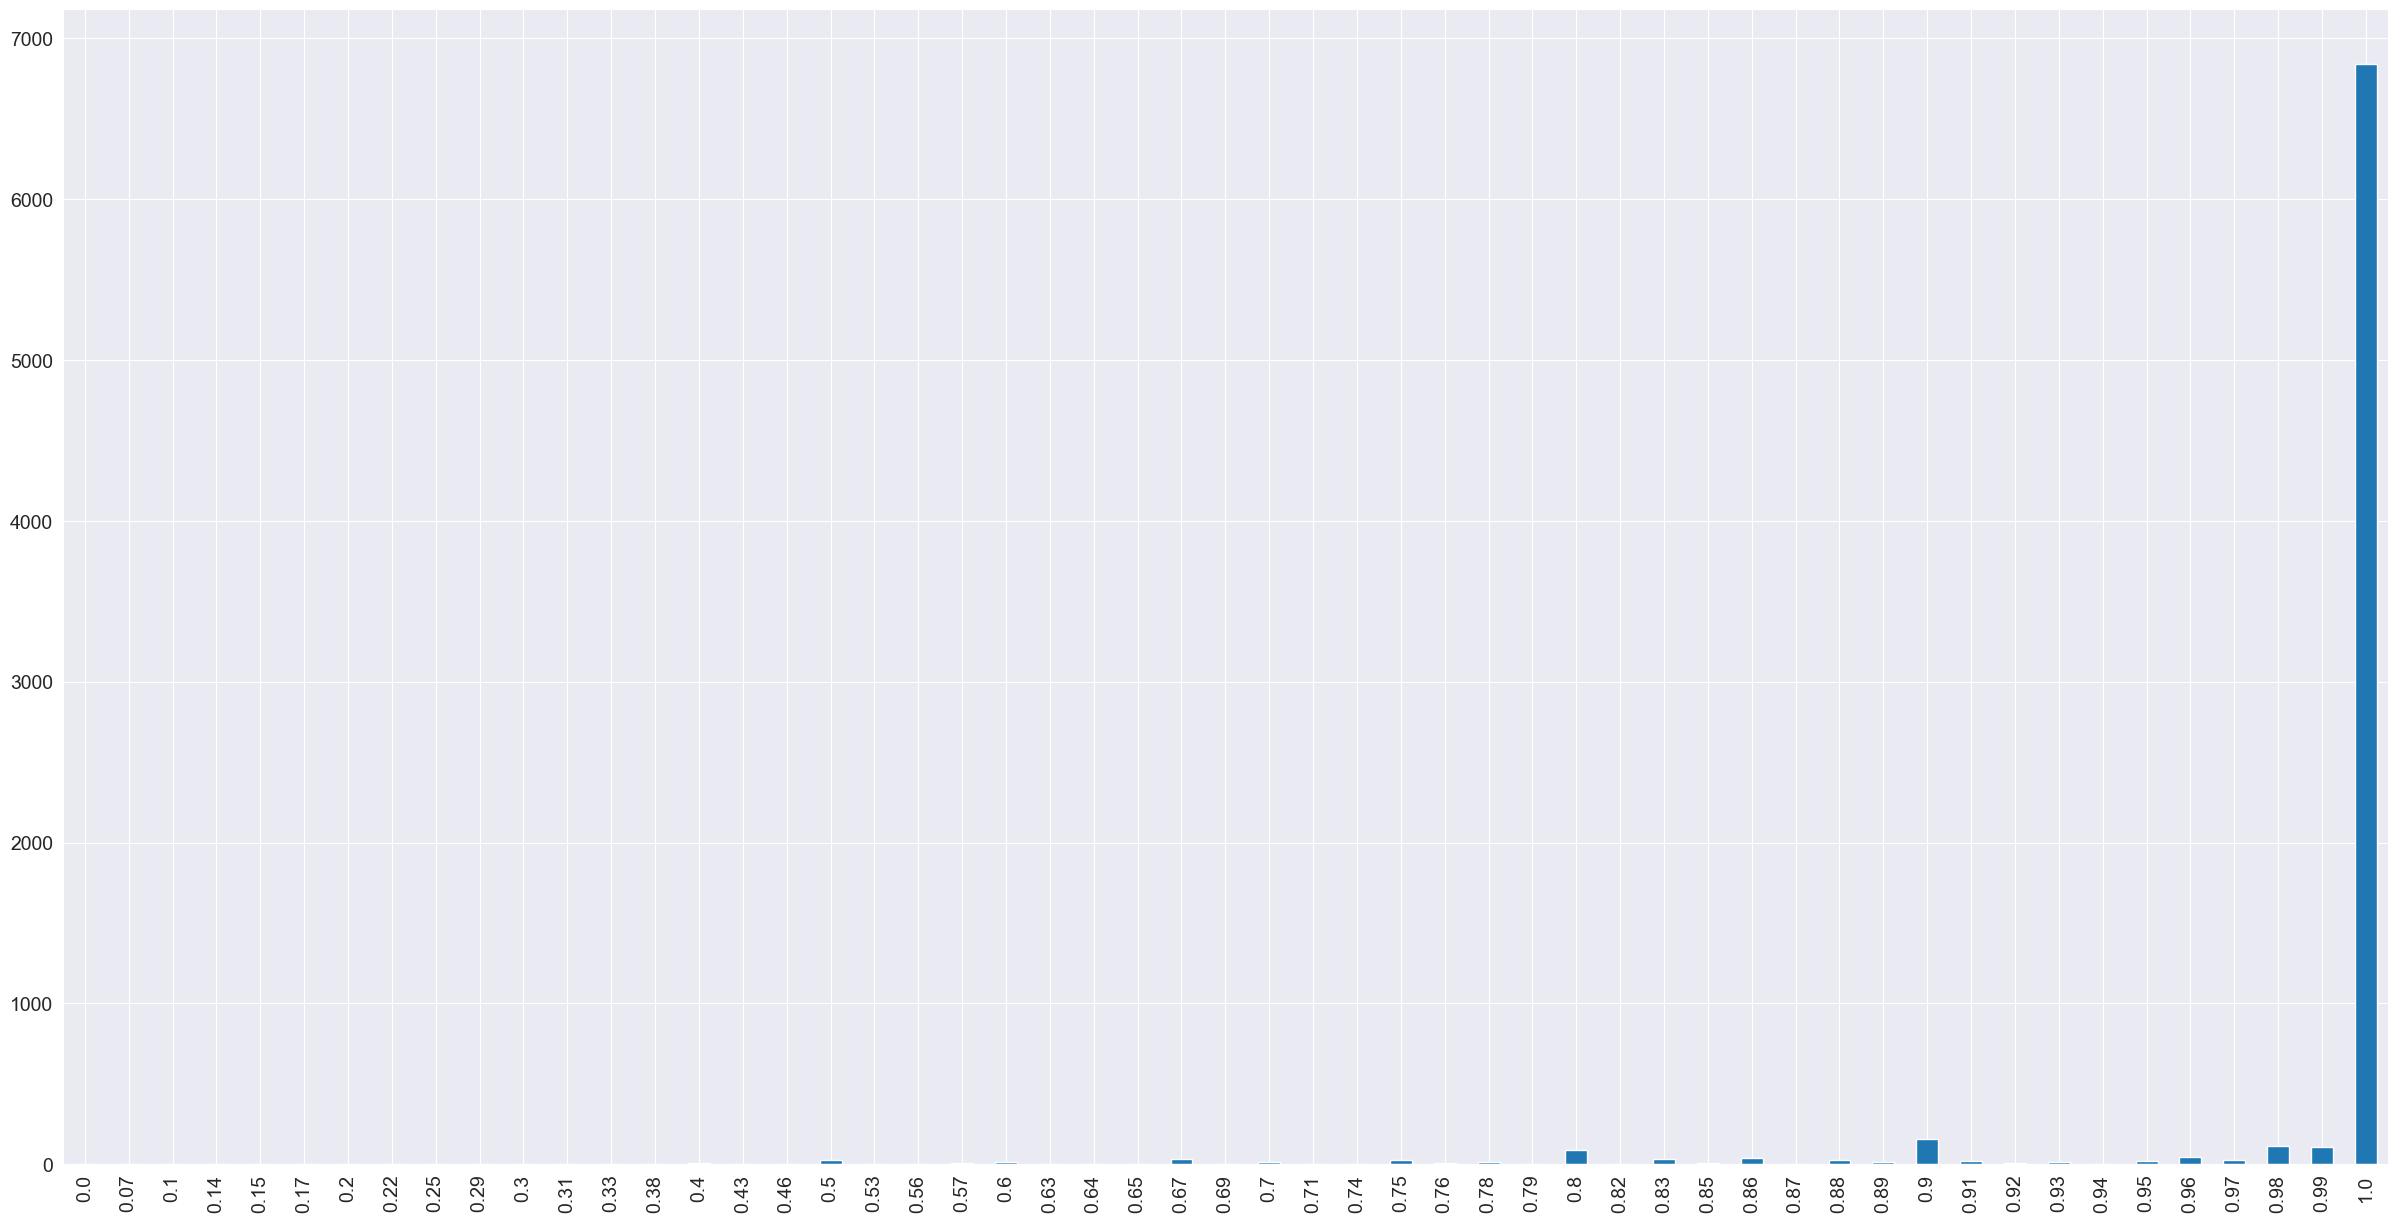



 wykres dla host_acceptance_rate: 


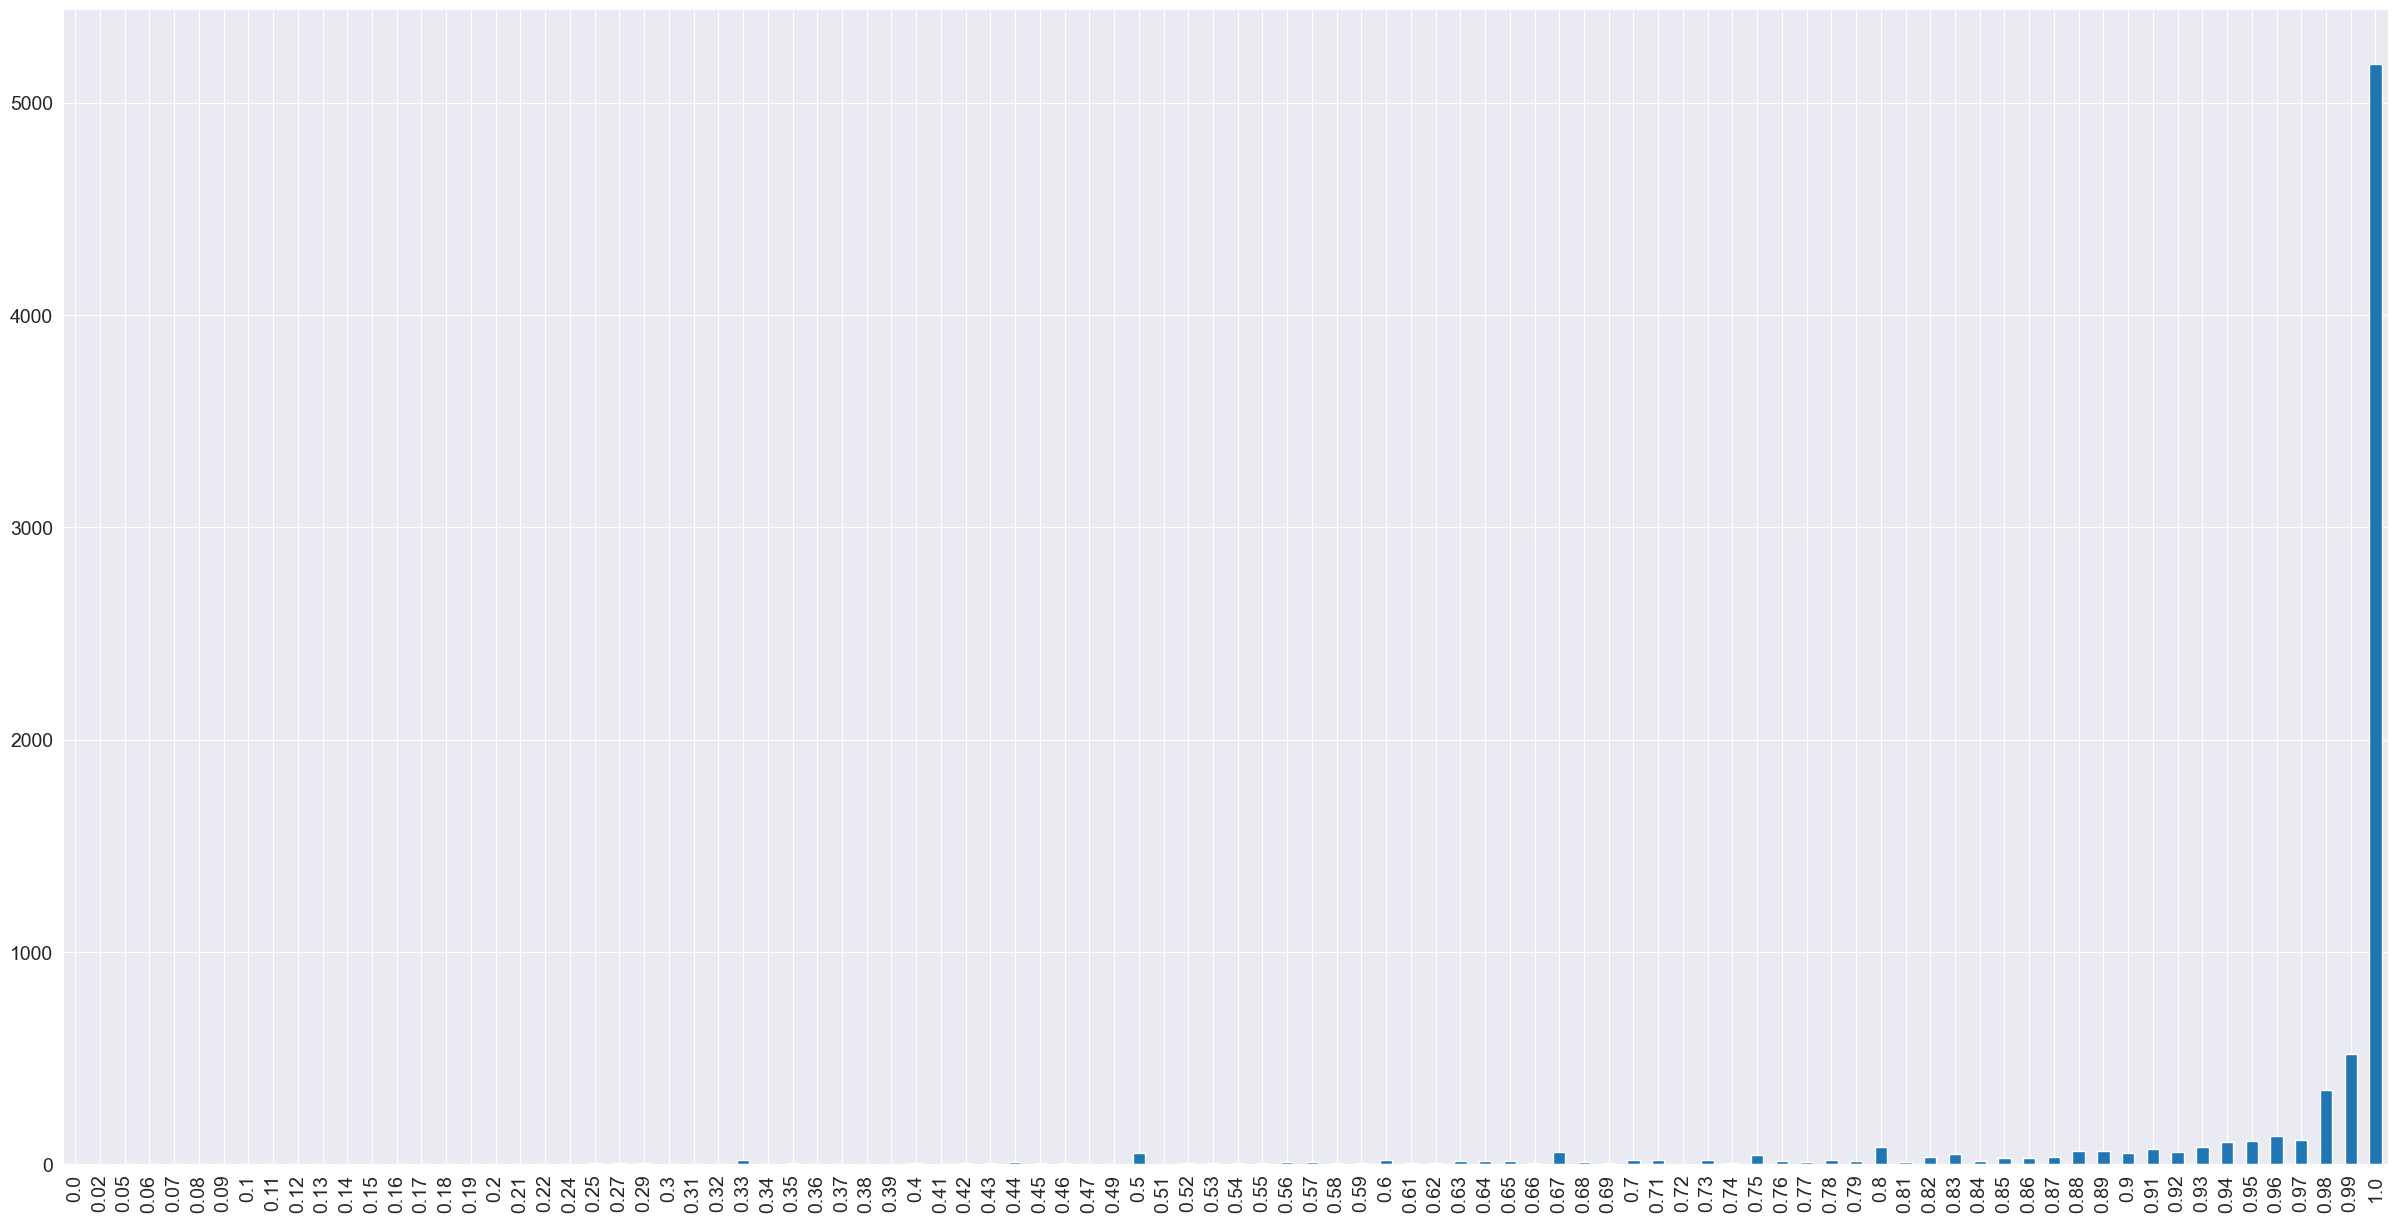



 wykres dla neighbourhood_group_cleansed: 
		błąd! (pusta kolumna): neighbourhood_group_cleansed


 wykres dla bathrooms: 


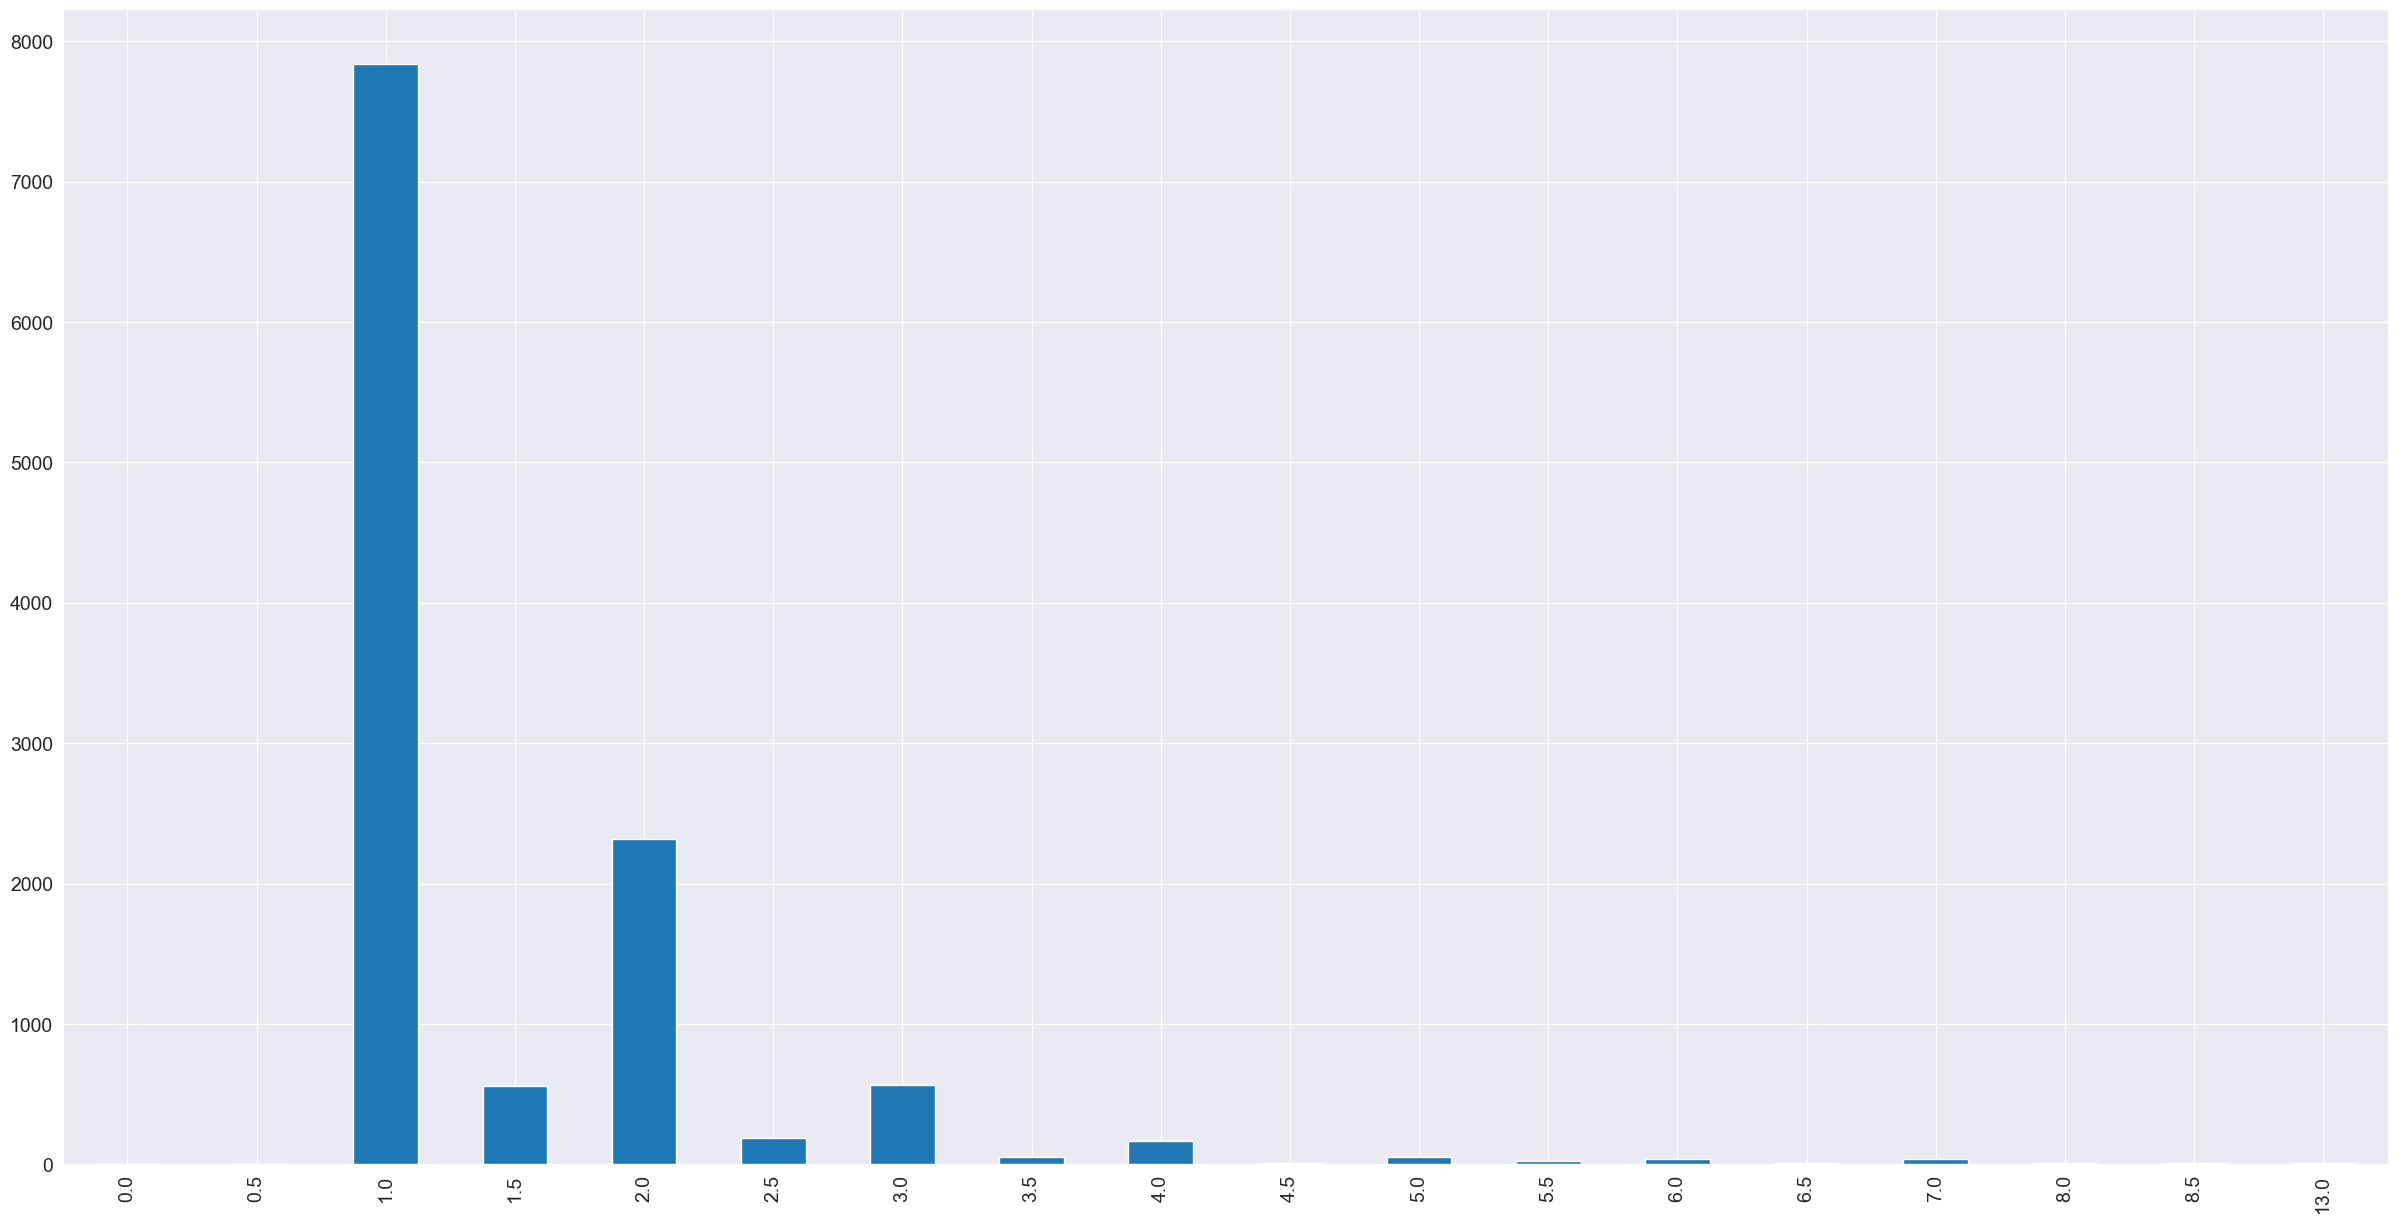



 wykres dla bedrooms: 


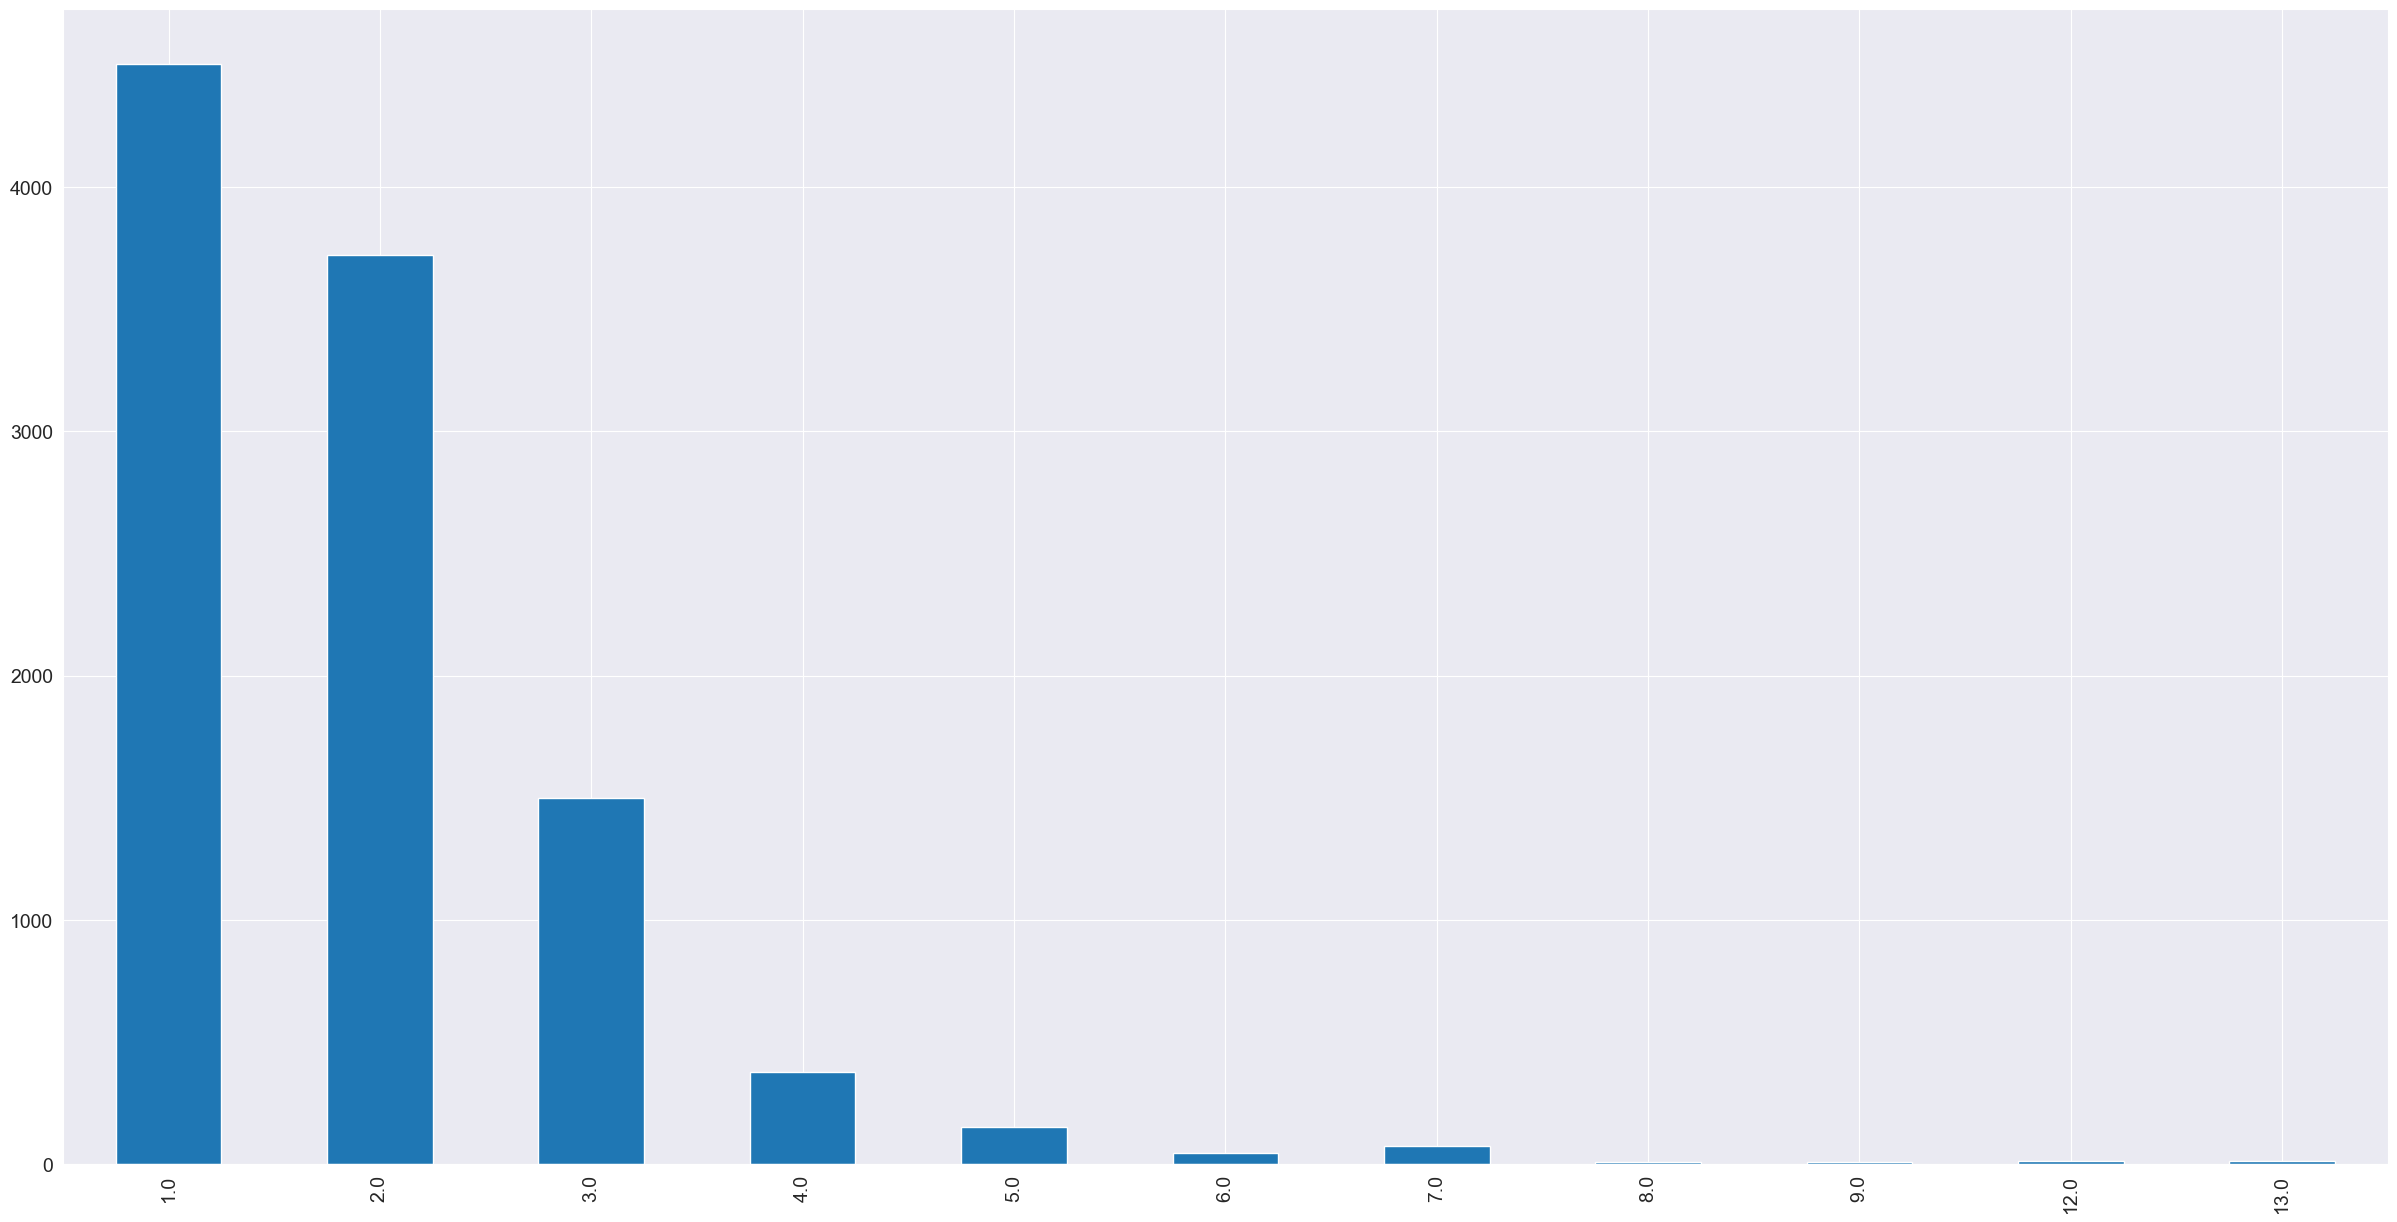



 wykres dla beds: 


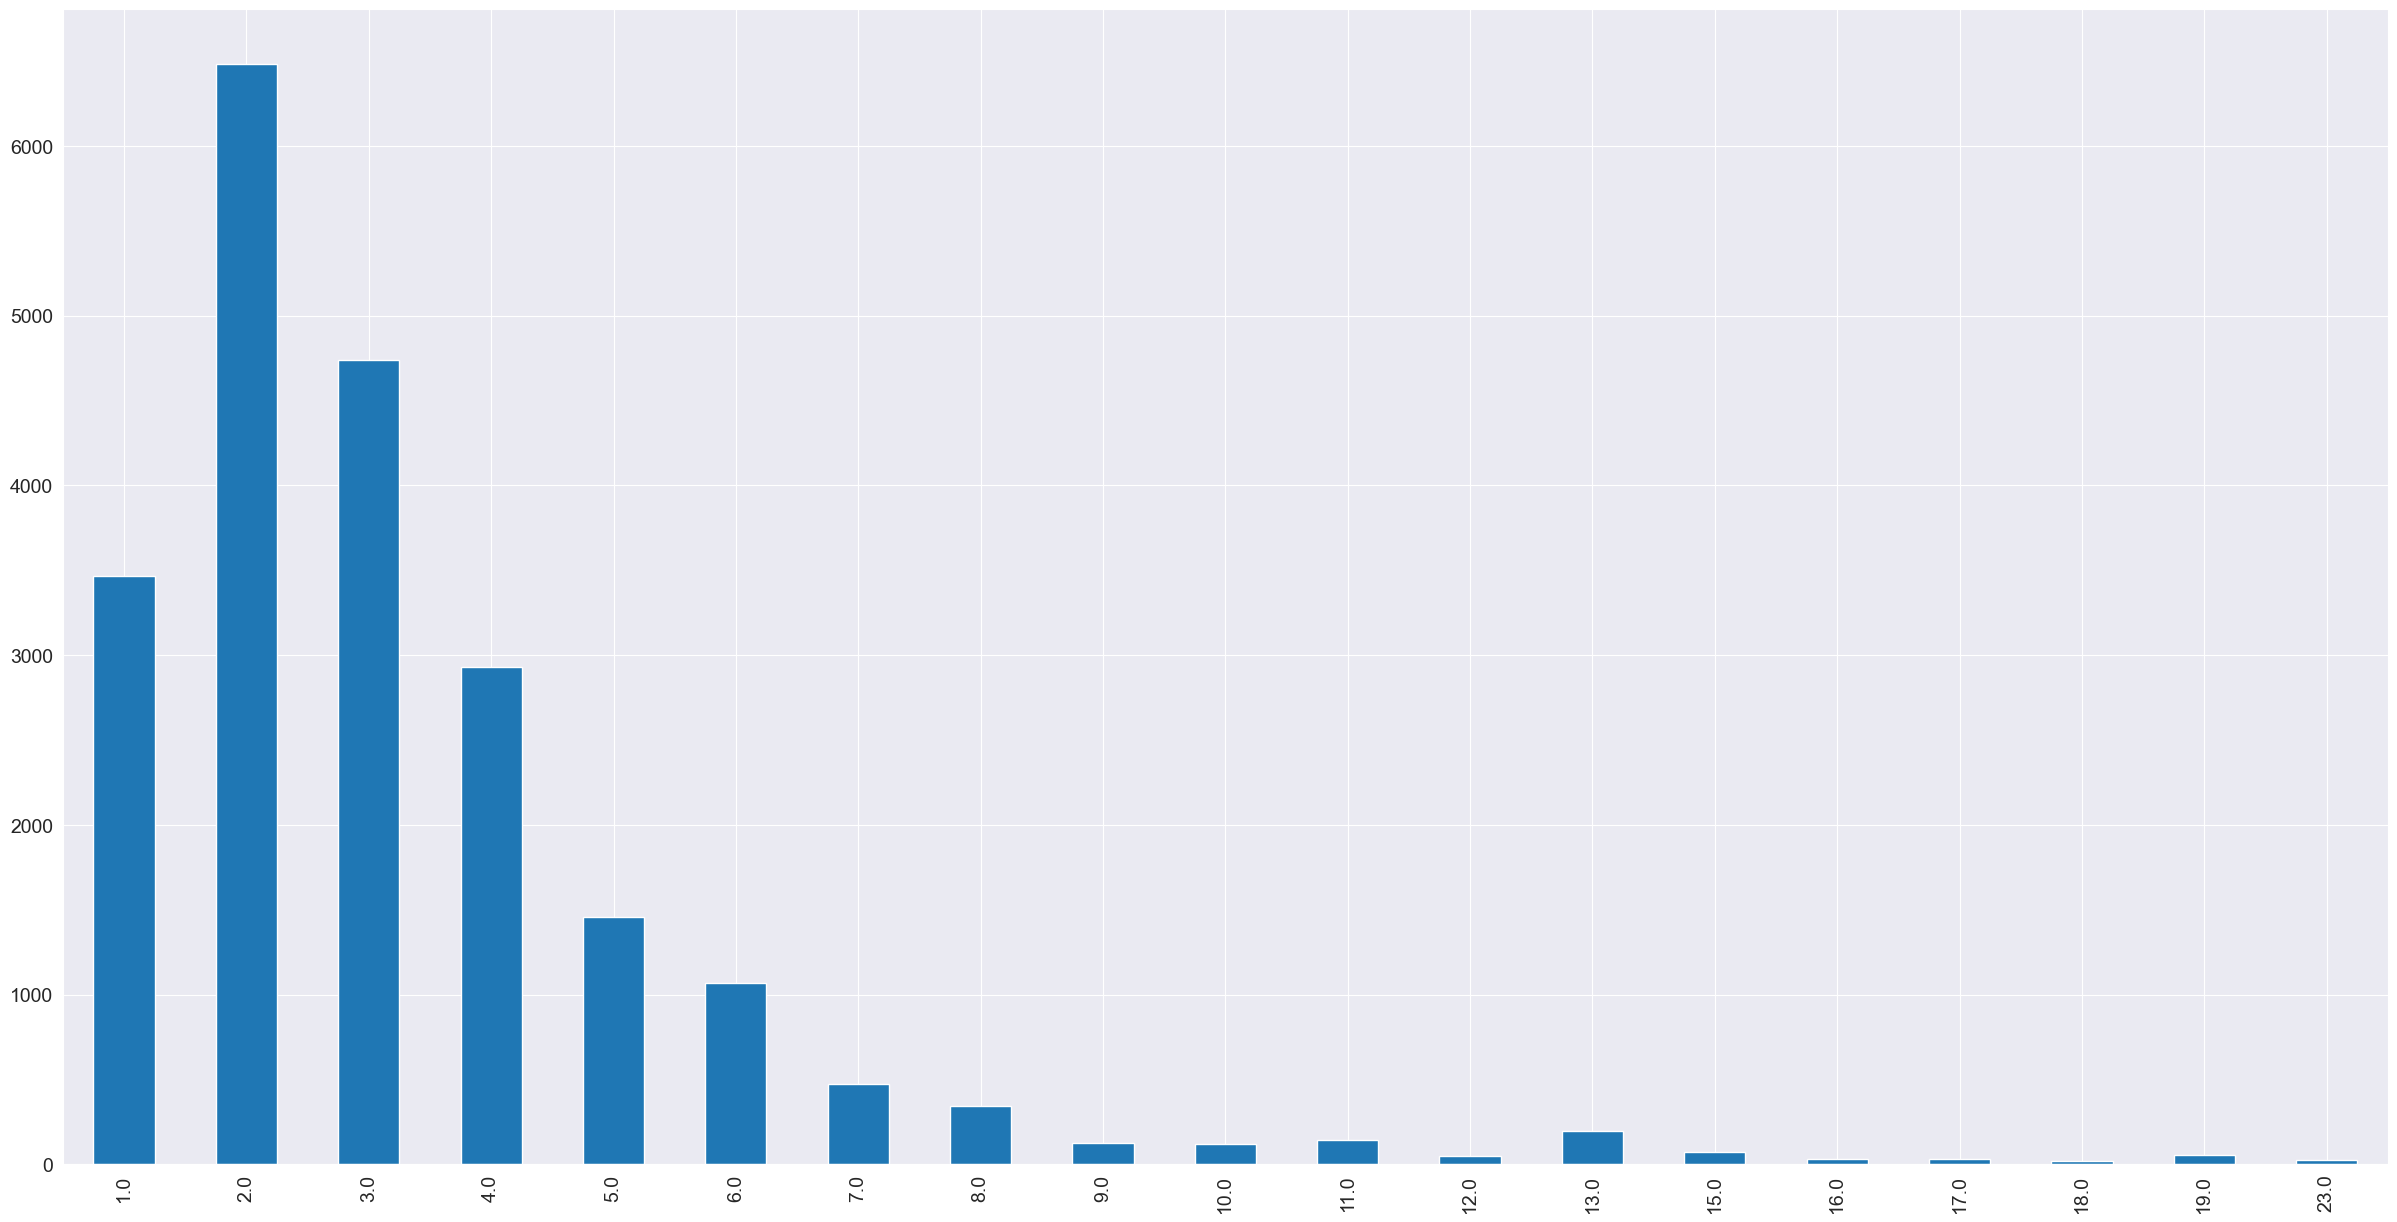



 wykres dla calendar_updated: 
		błąd! (pusta kolumna): calendar_updated


 wykres dla review_scores_rating: 
za duzo wartosci, zaokraglono do 0,1 
 


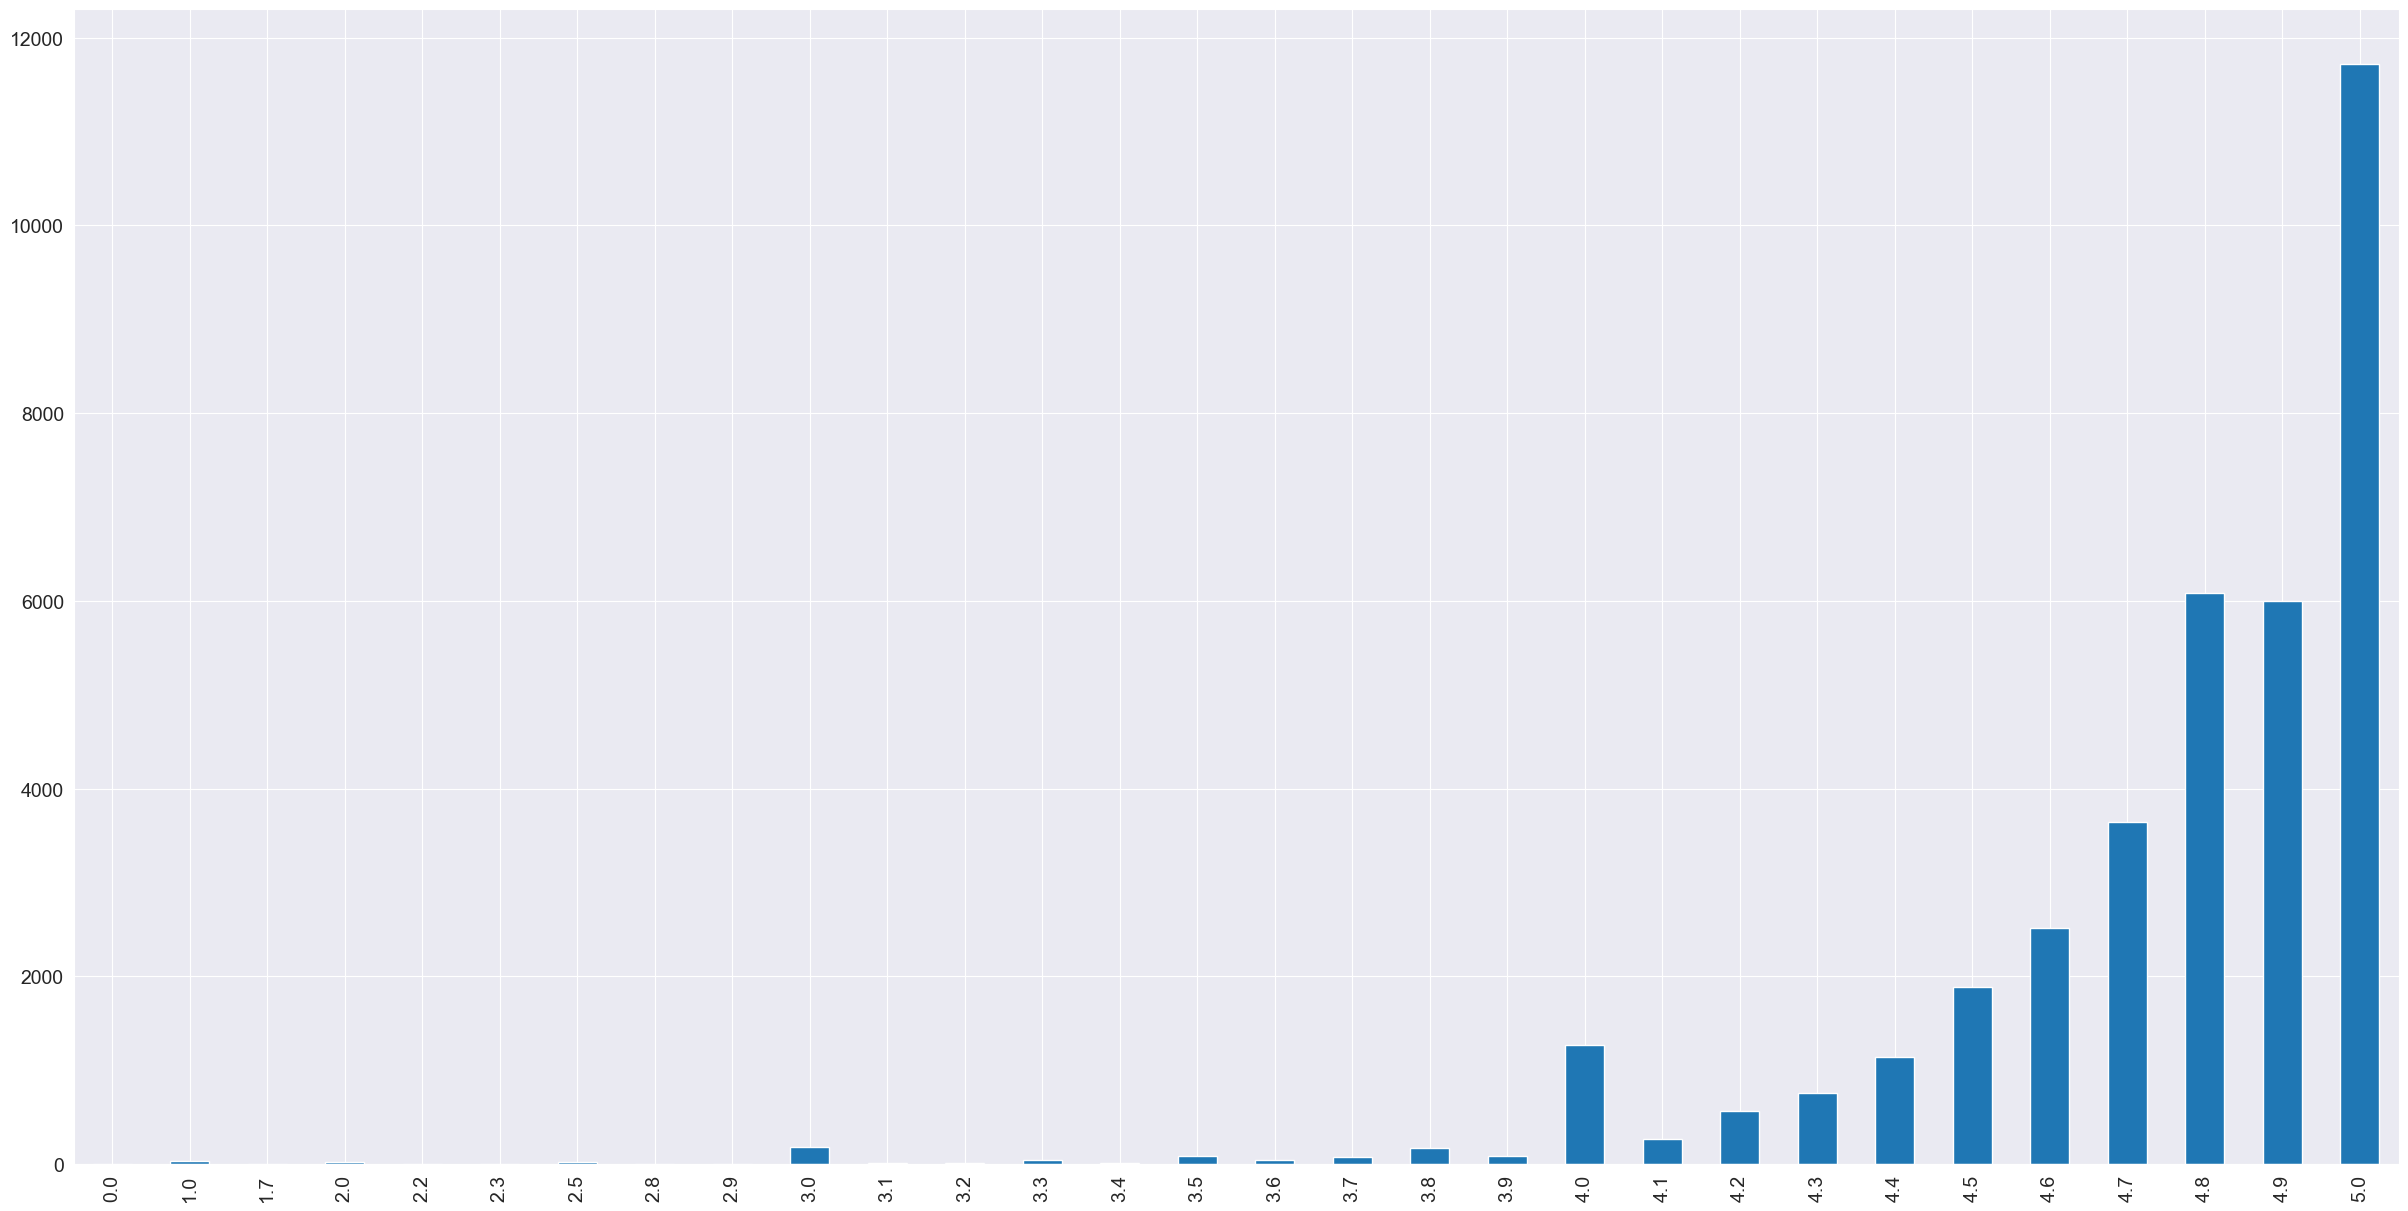



 wykres dla review_scores_accuracy: 
za duzo wartosci, zaokraglono do 0,1 
 


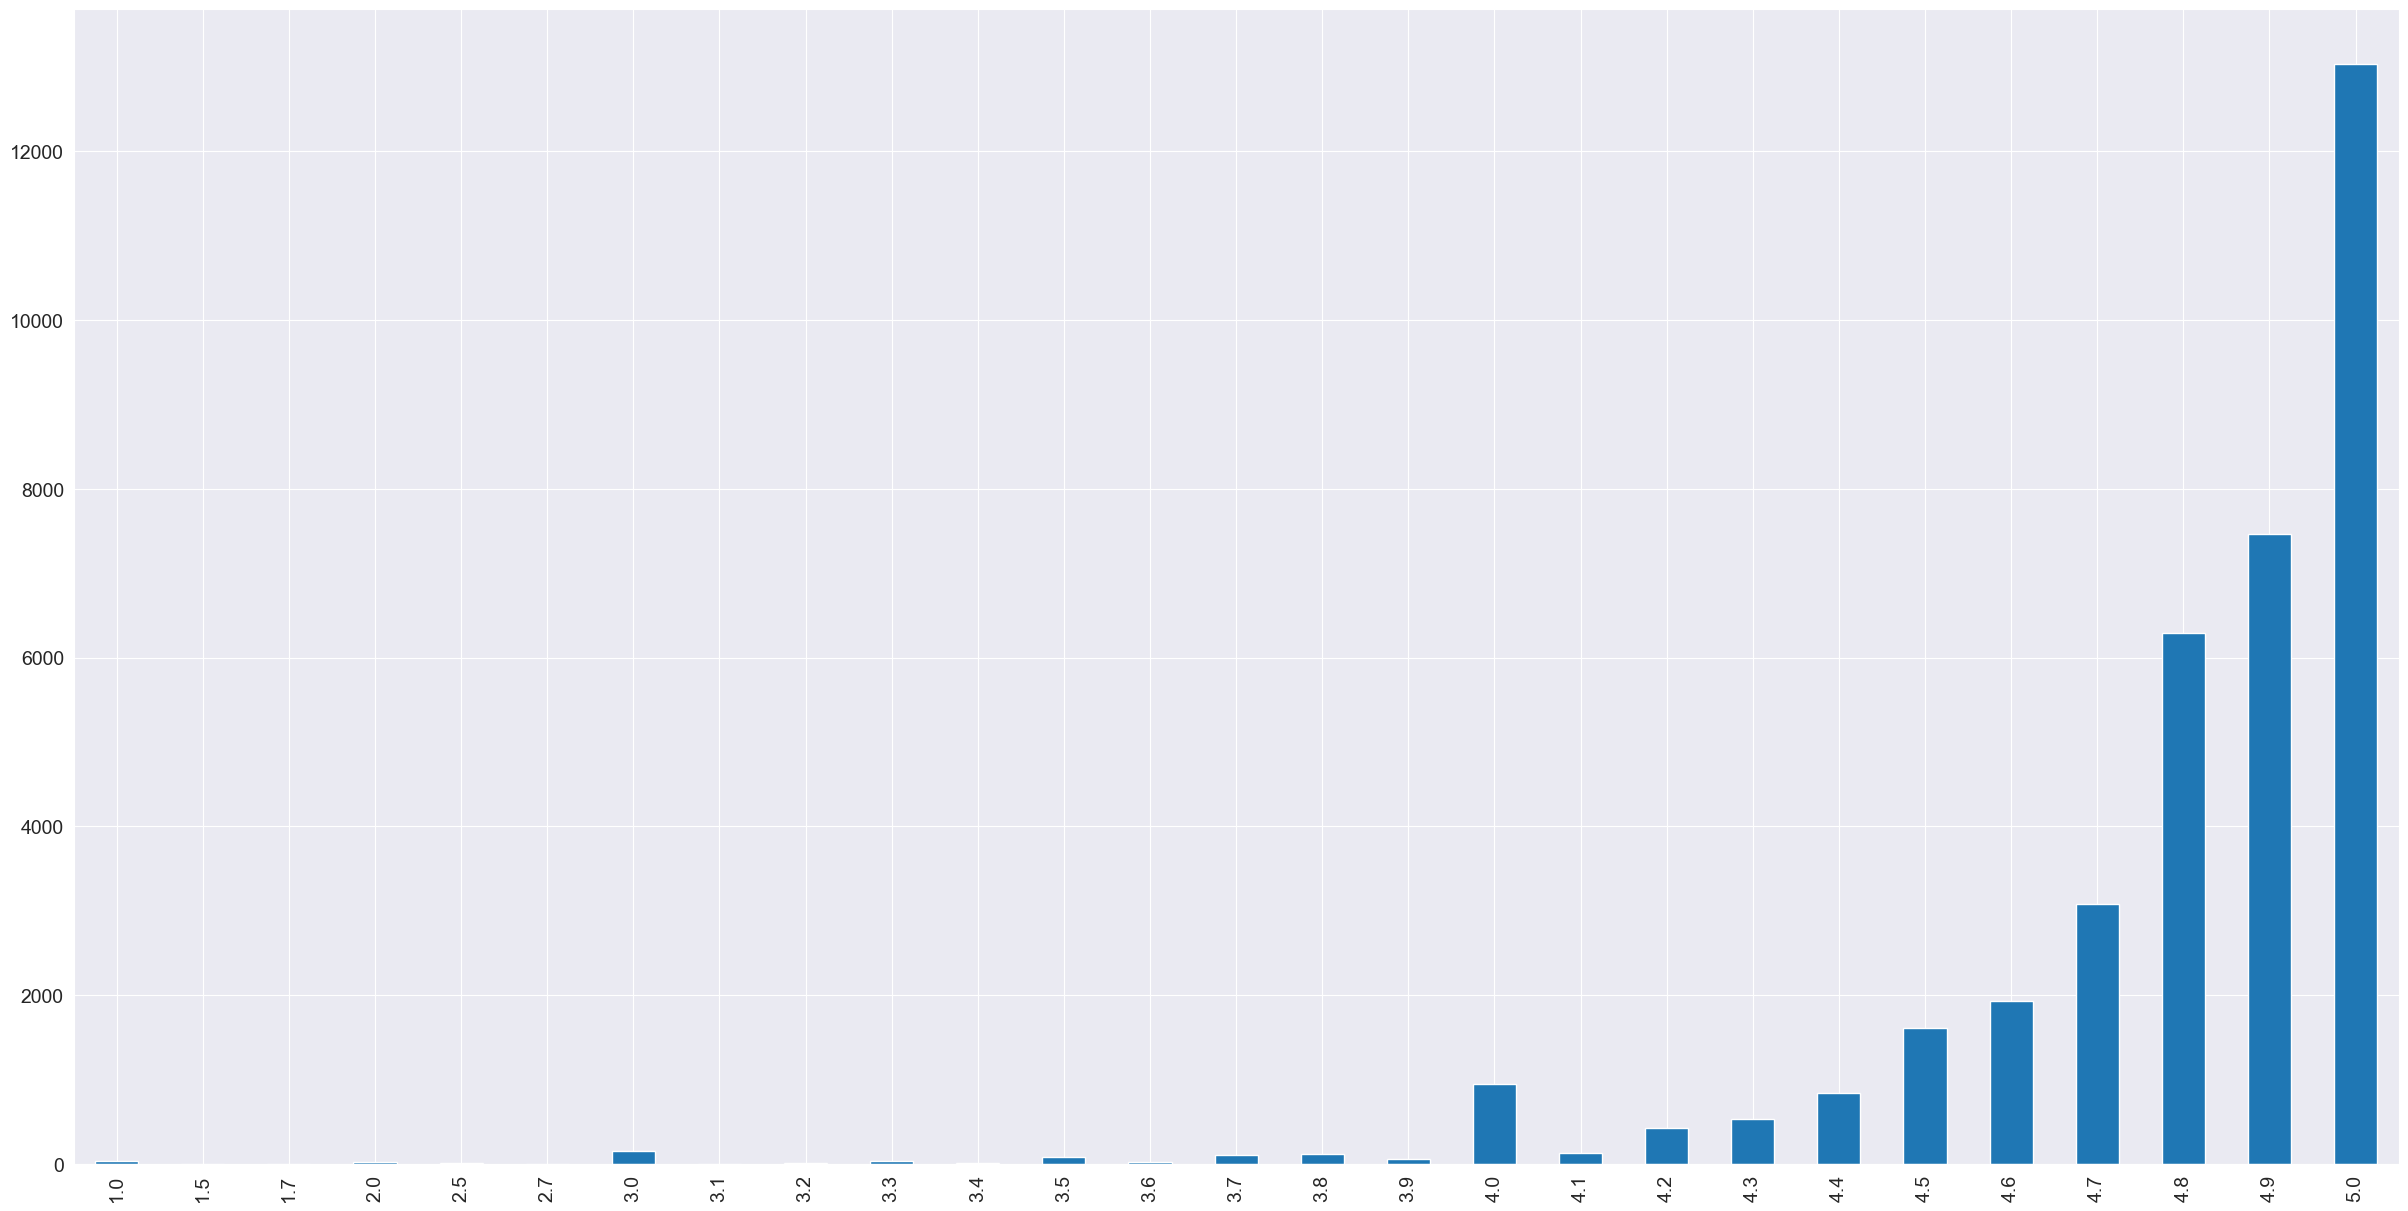



 wykres dla review_scores_cleanliness: 
za duzo wartosci, zaokraglono do 0,1 
 


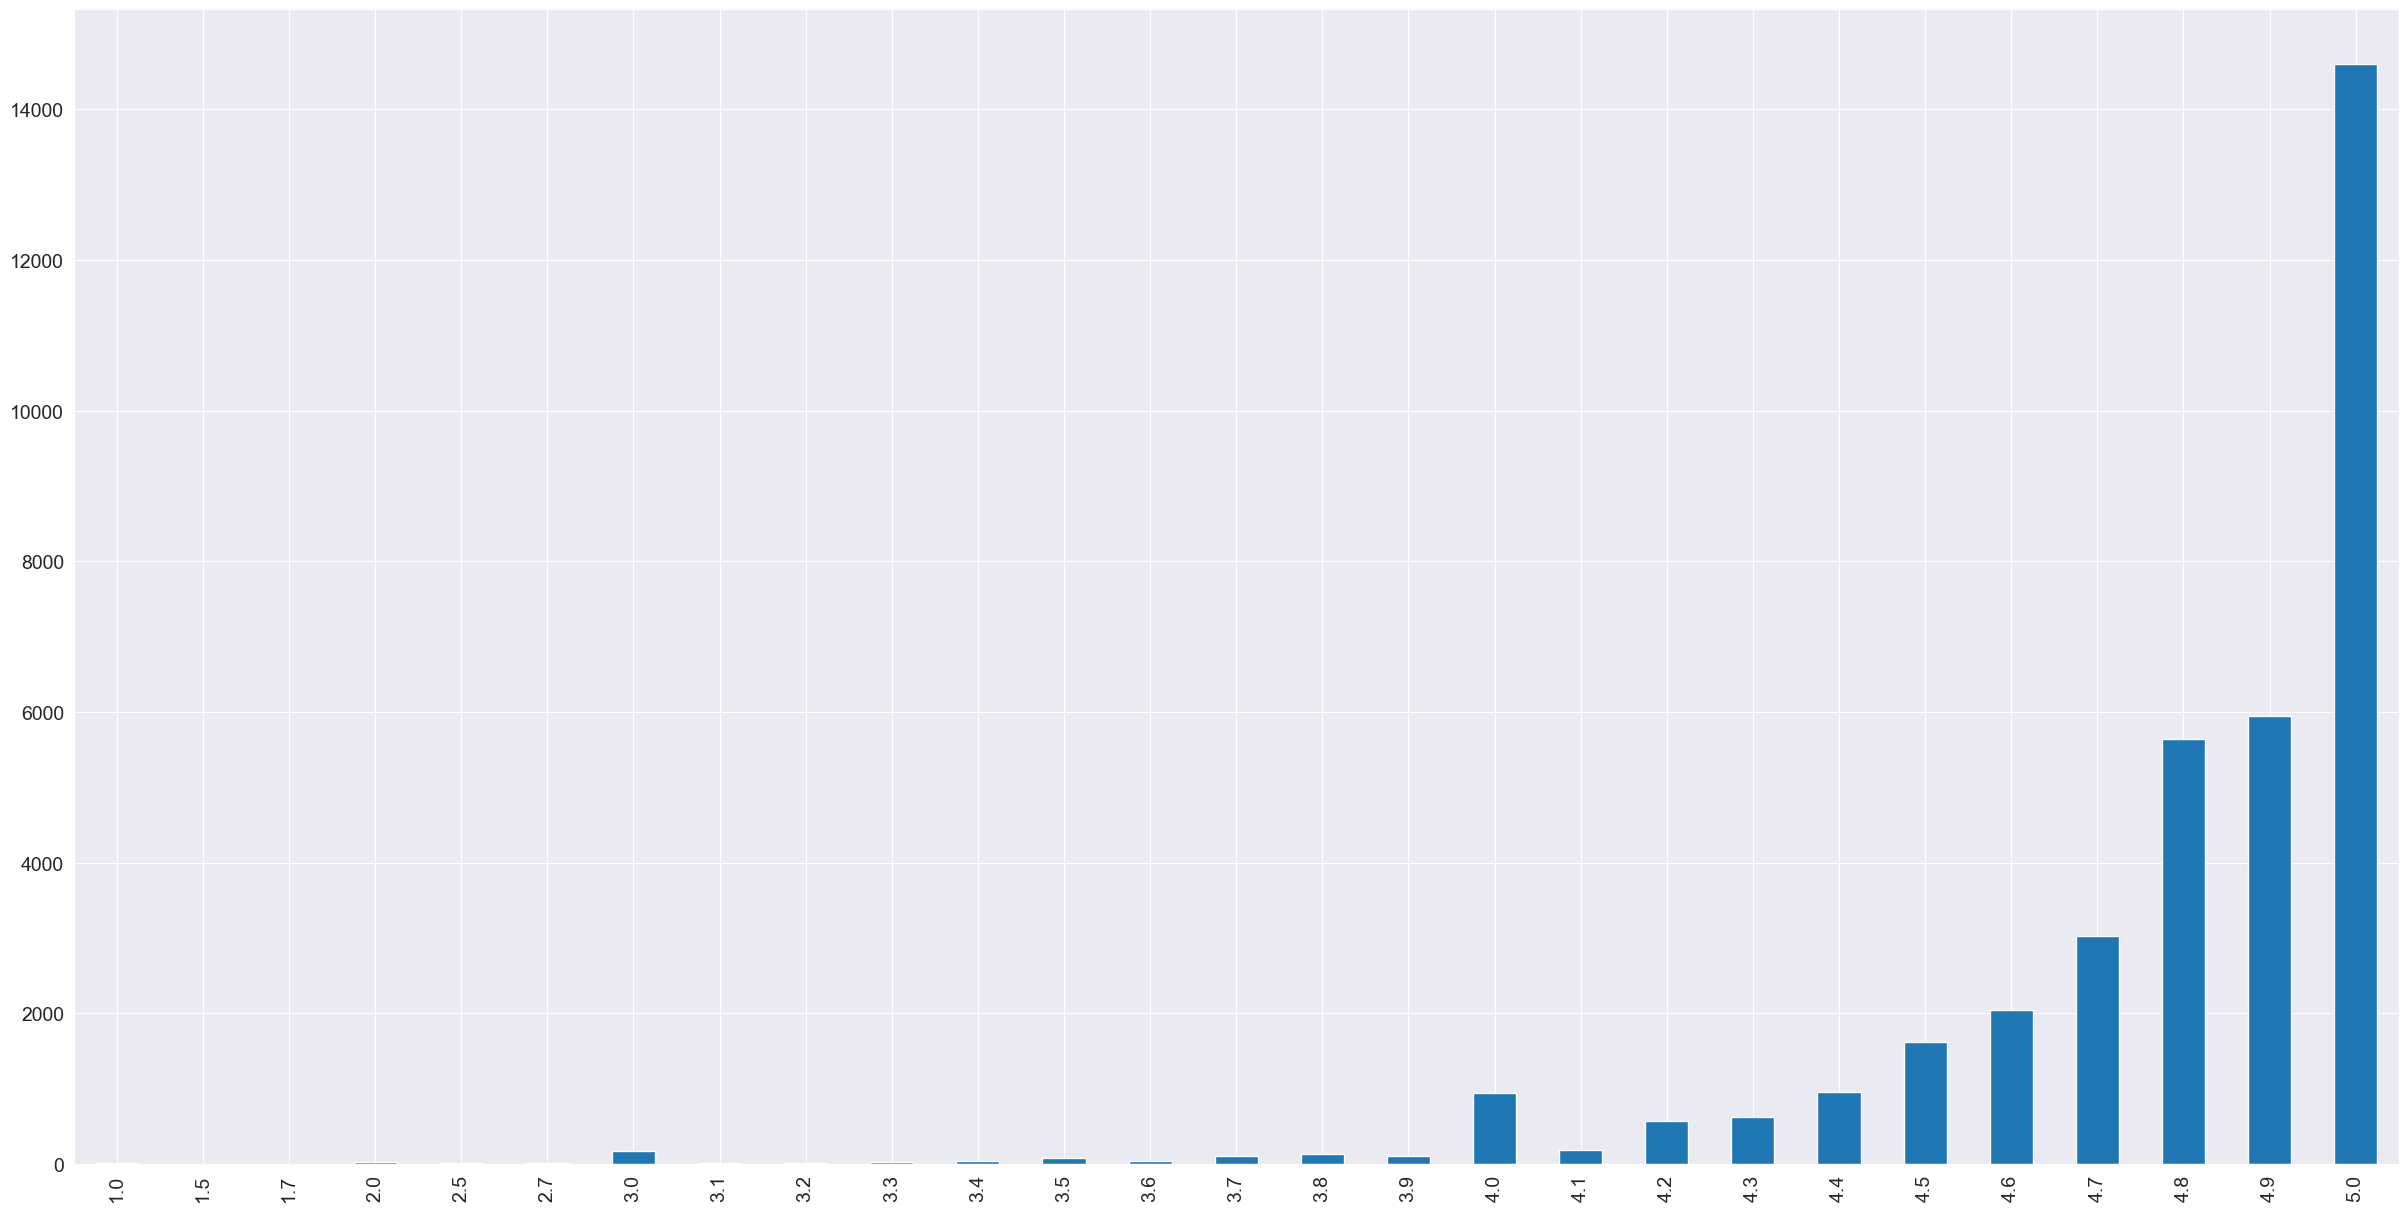



 wykres dla review_scores_checkin: 


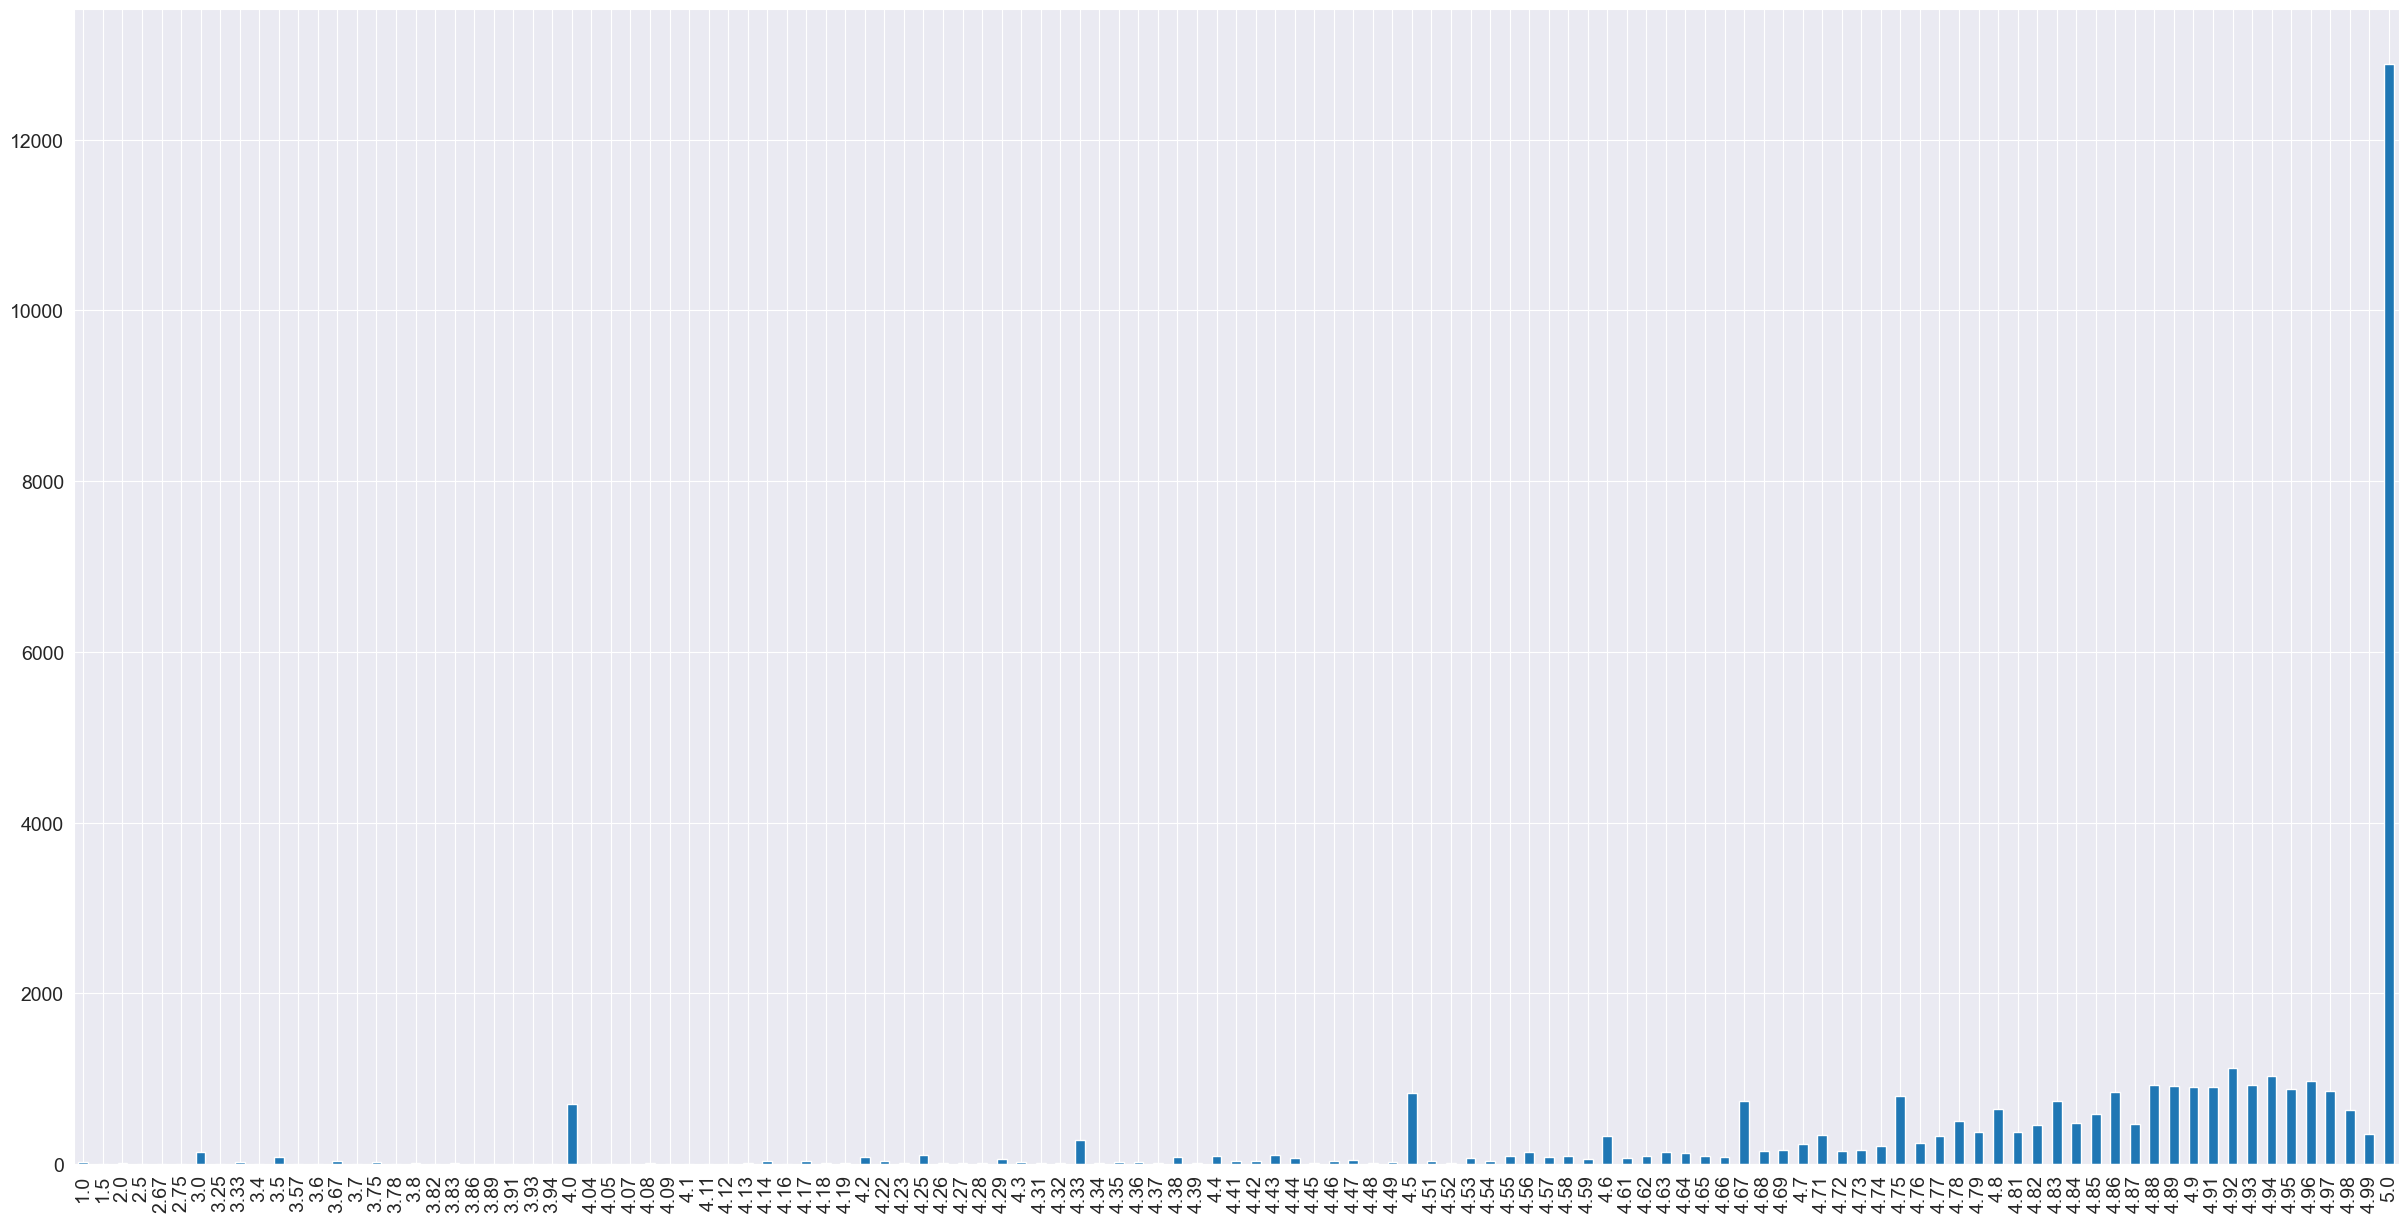



 wykres dla review_scores_communication: 
za duzo wartosci, zaokraglono do 0,1 
 


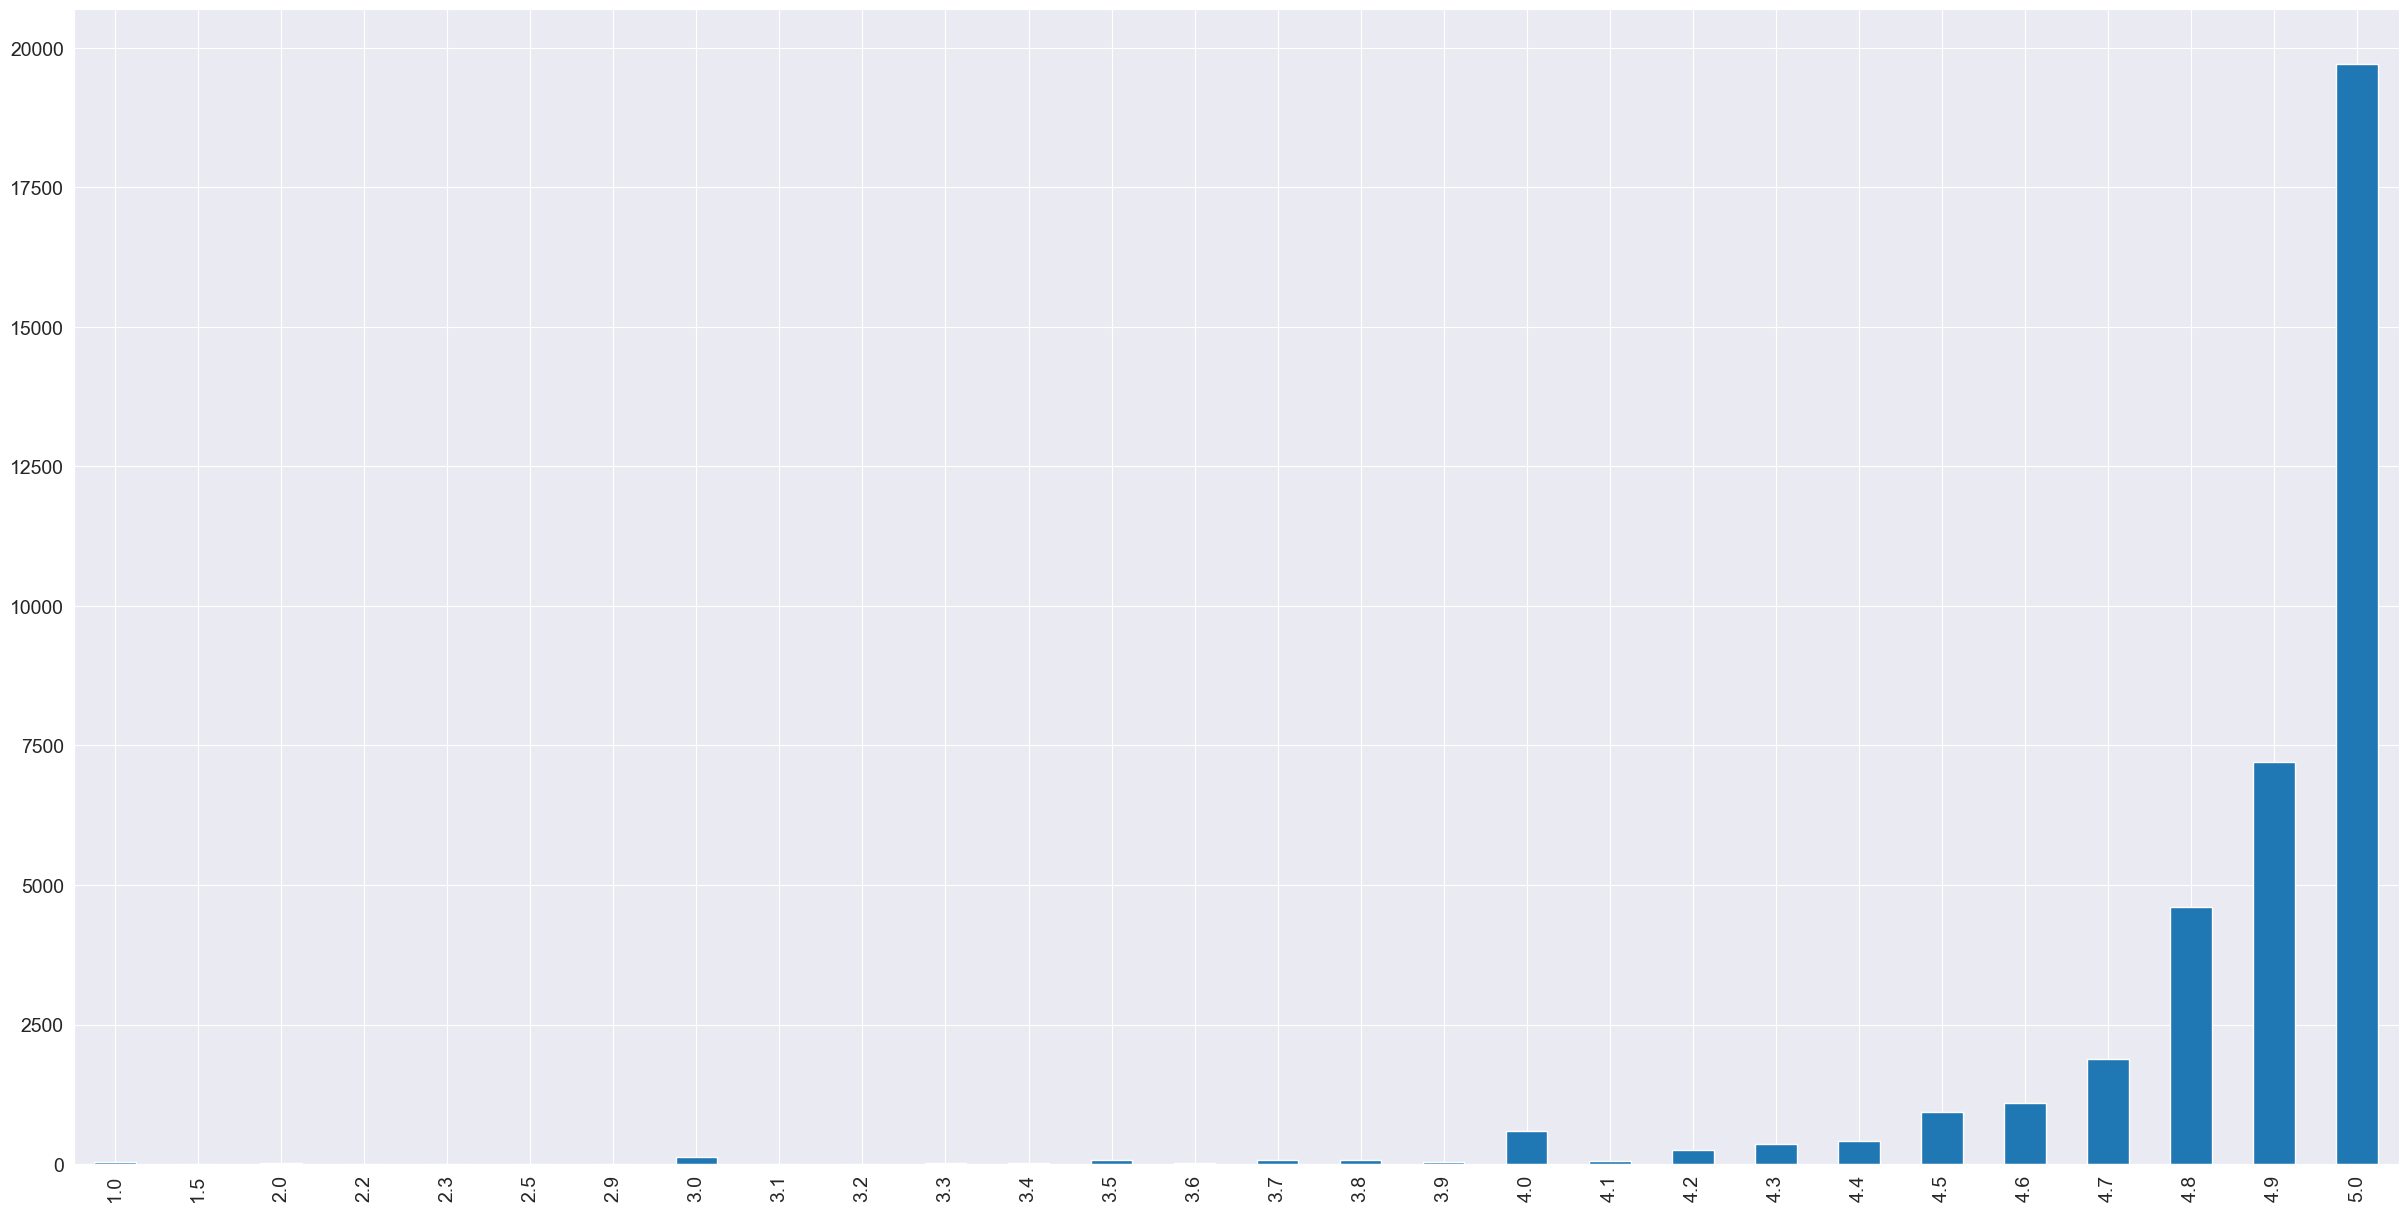



 wykres dla review_scores_location: 
za duzo wartosci, zaokraglono do 0,1 
 


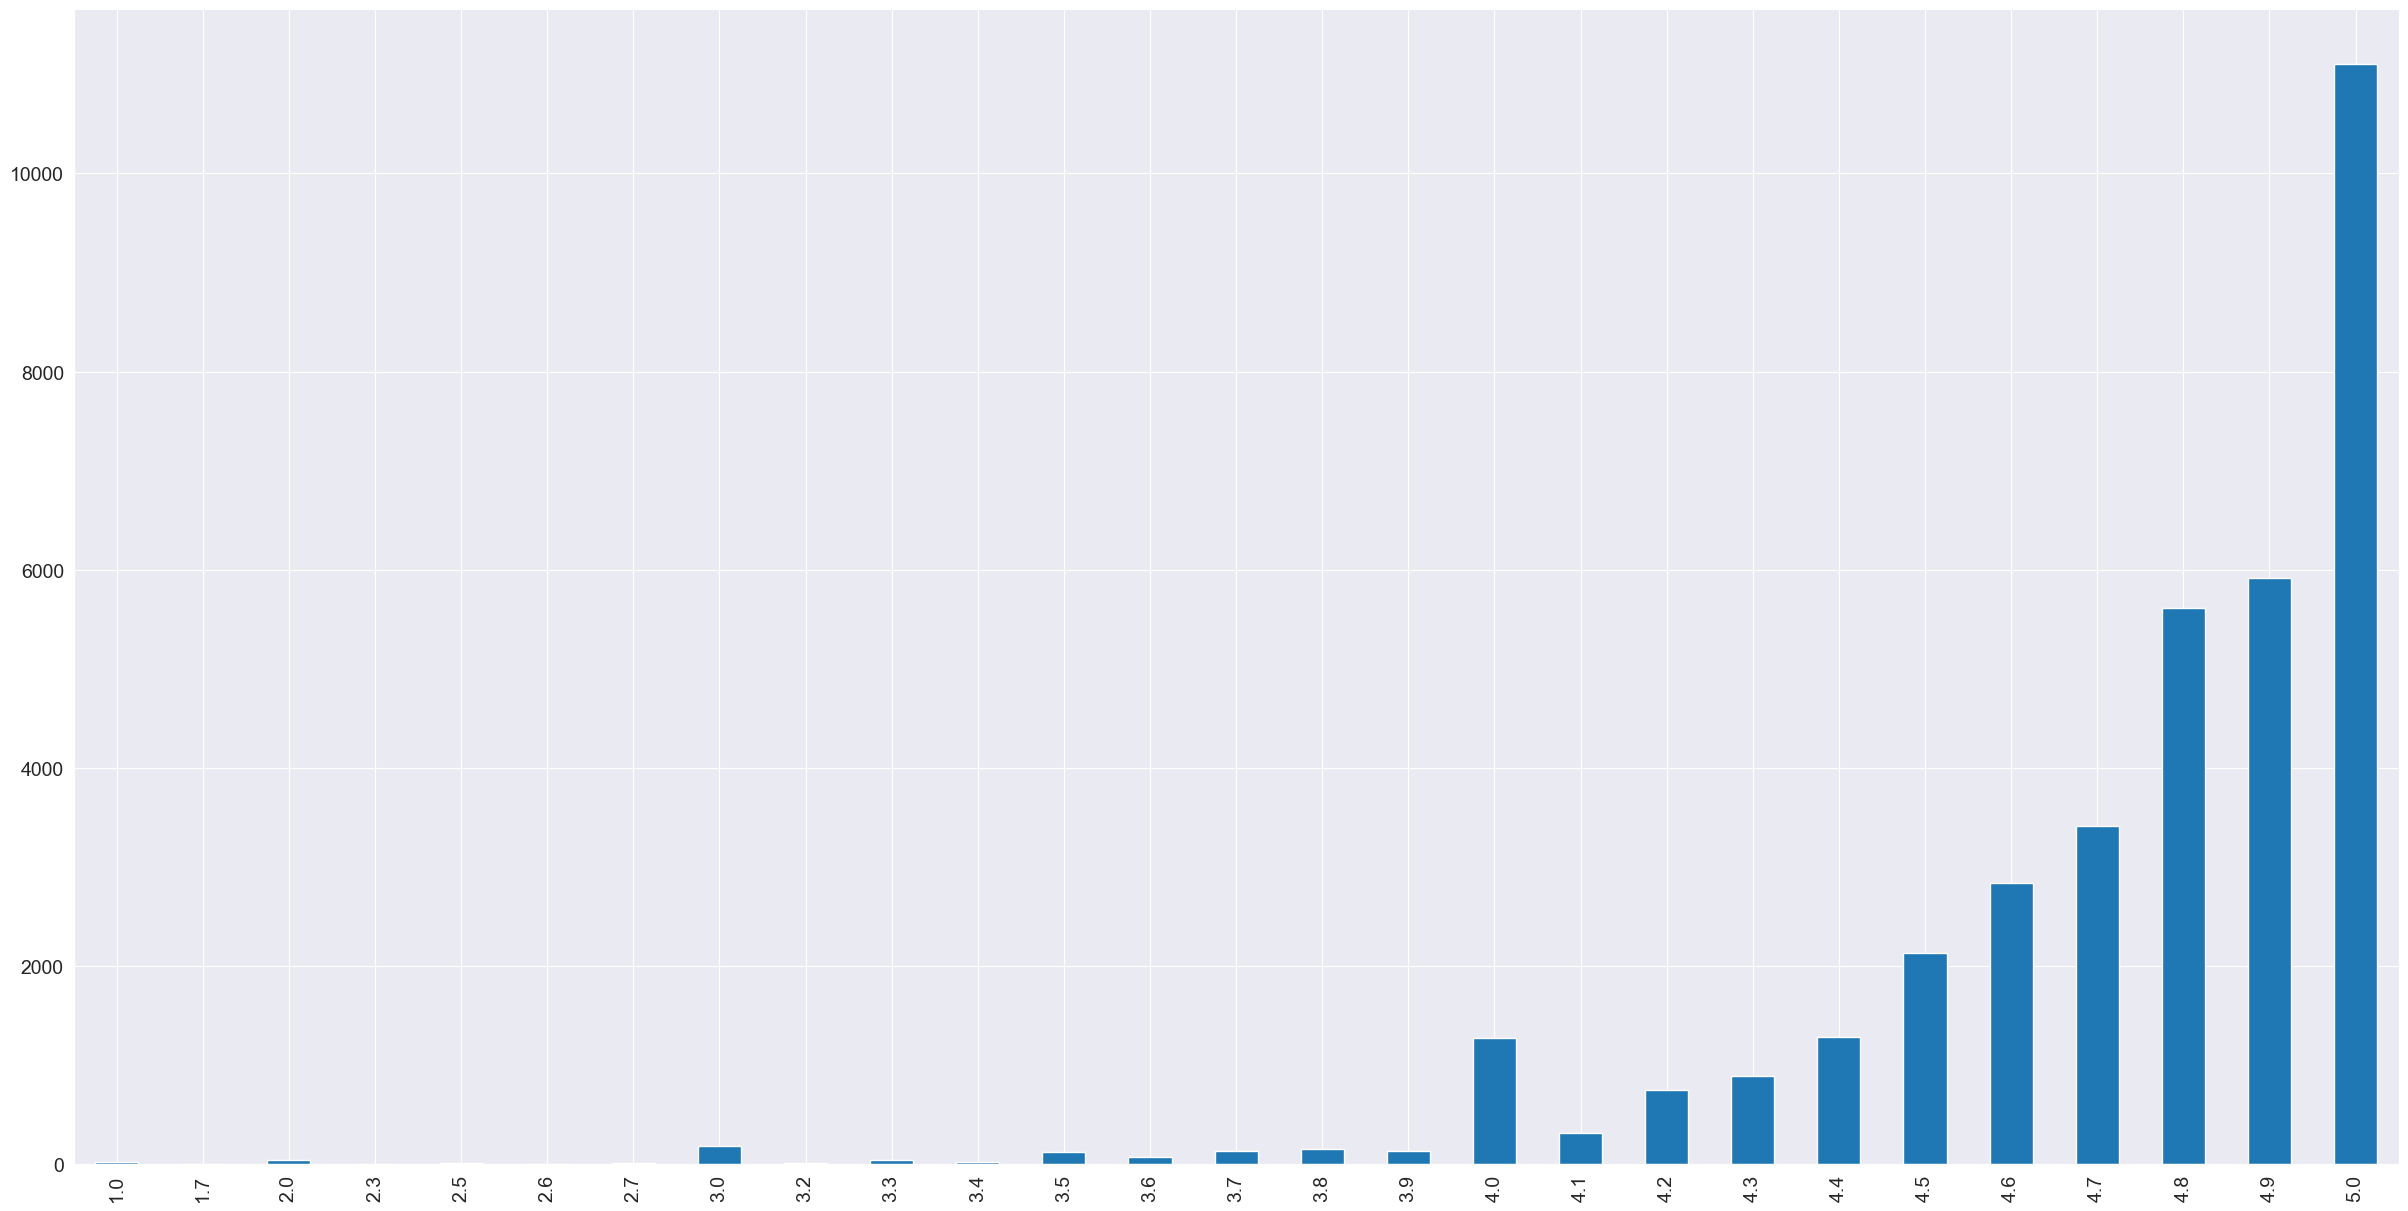



 wykres dla review_scores_value: 
za duzo wartosci, zaokraglono do 0,1 
 


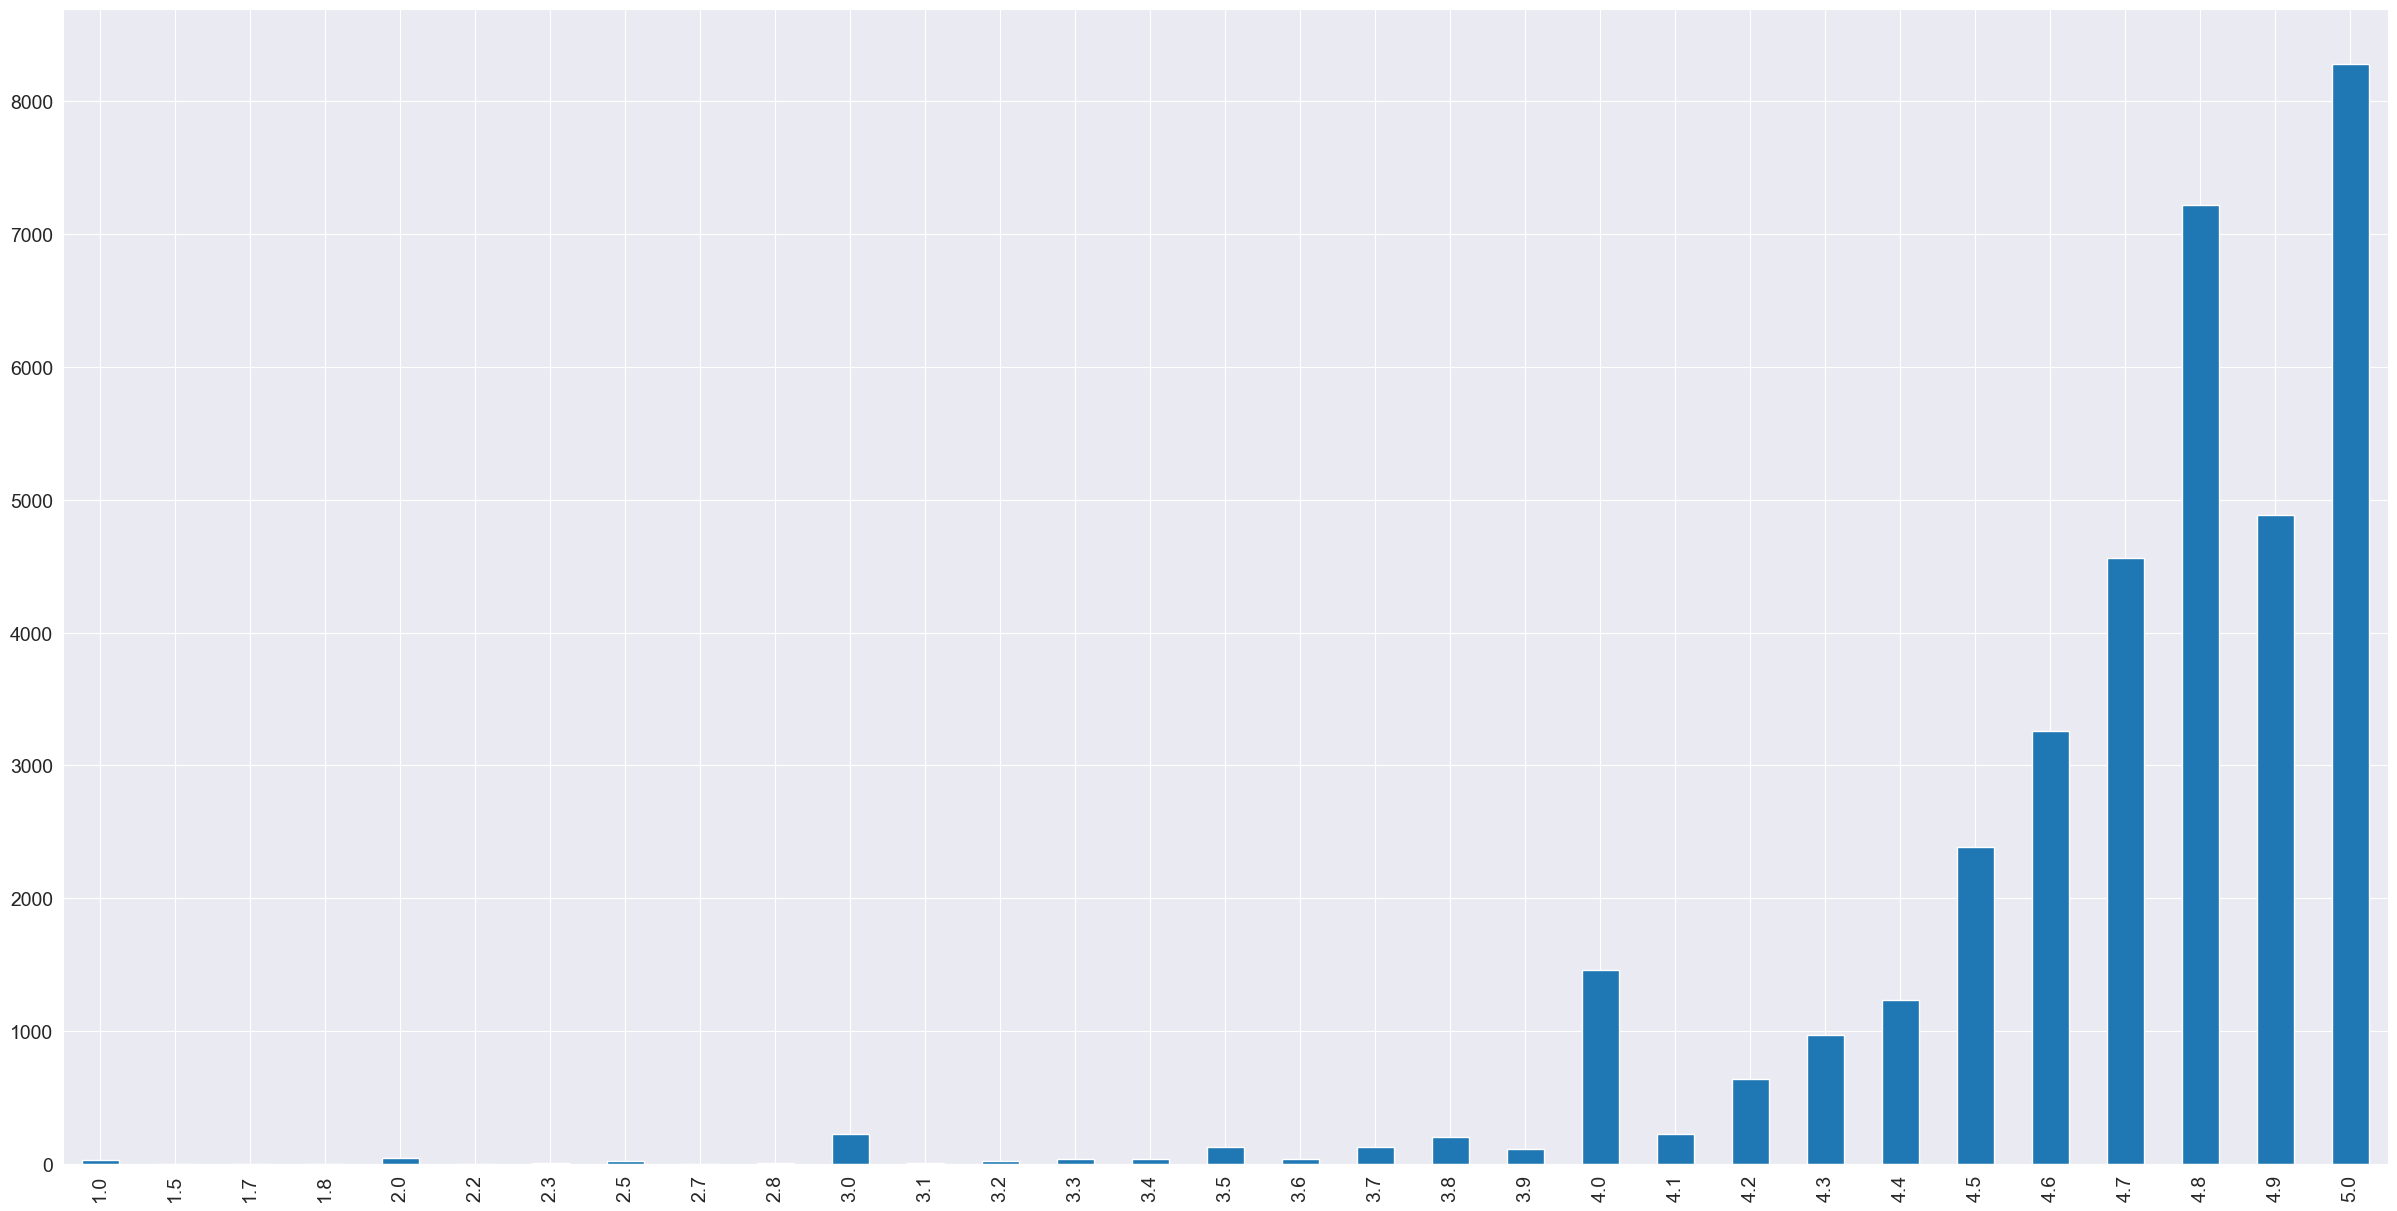



 wykres dla reviews_per_month: 
za duzo wartosci, zaokraglono do 0,1 
 


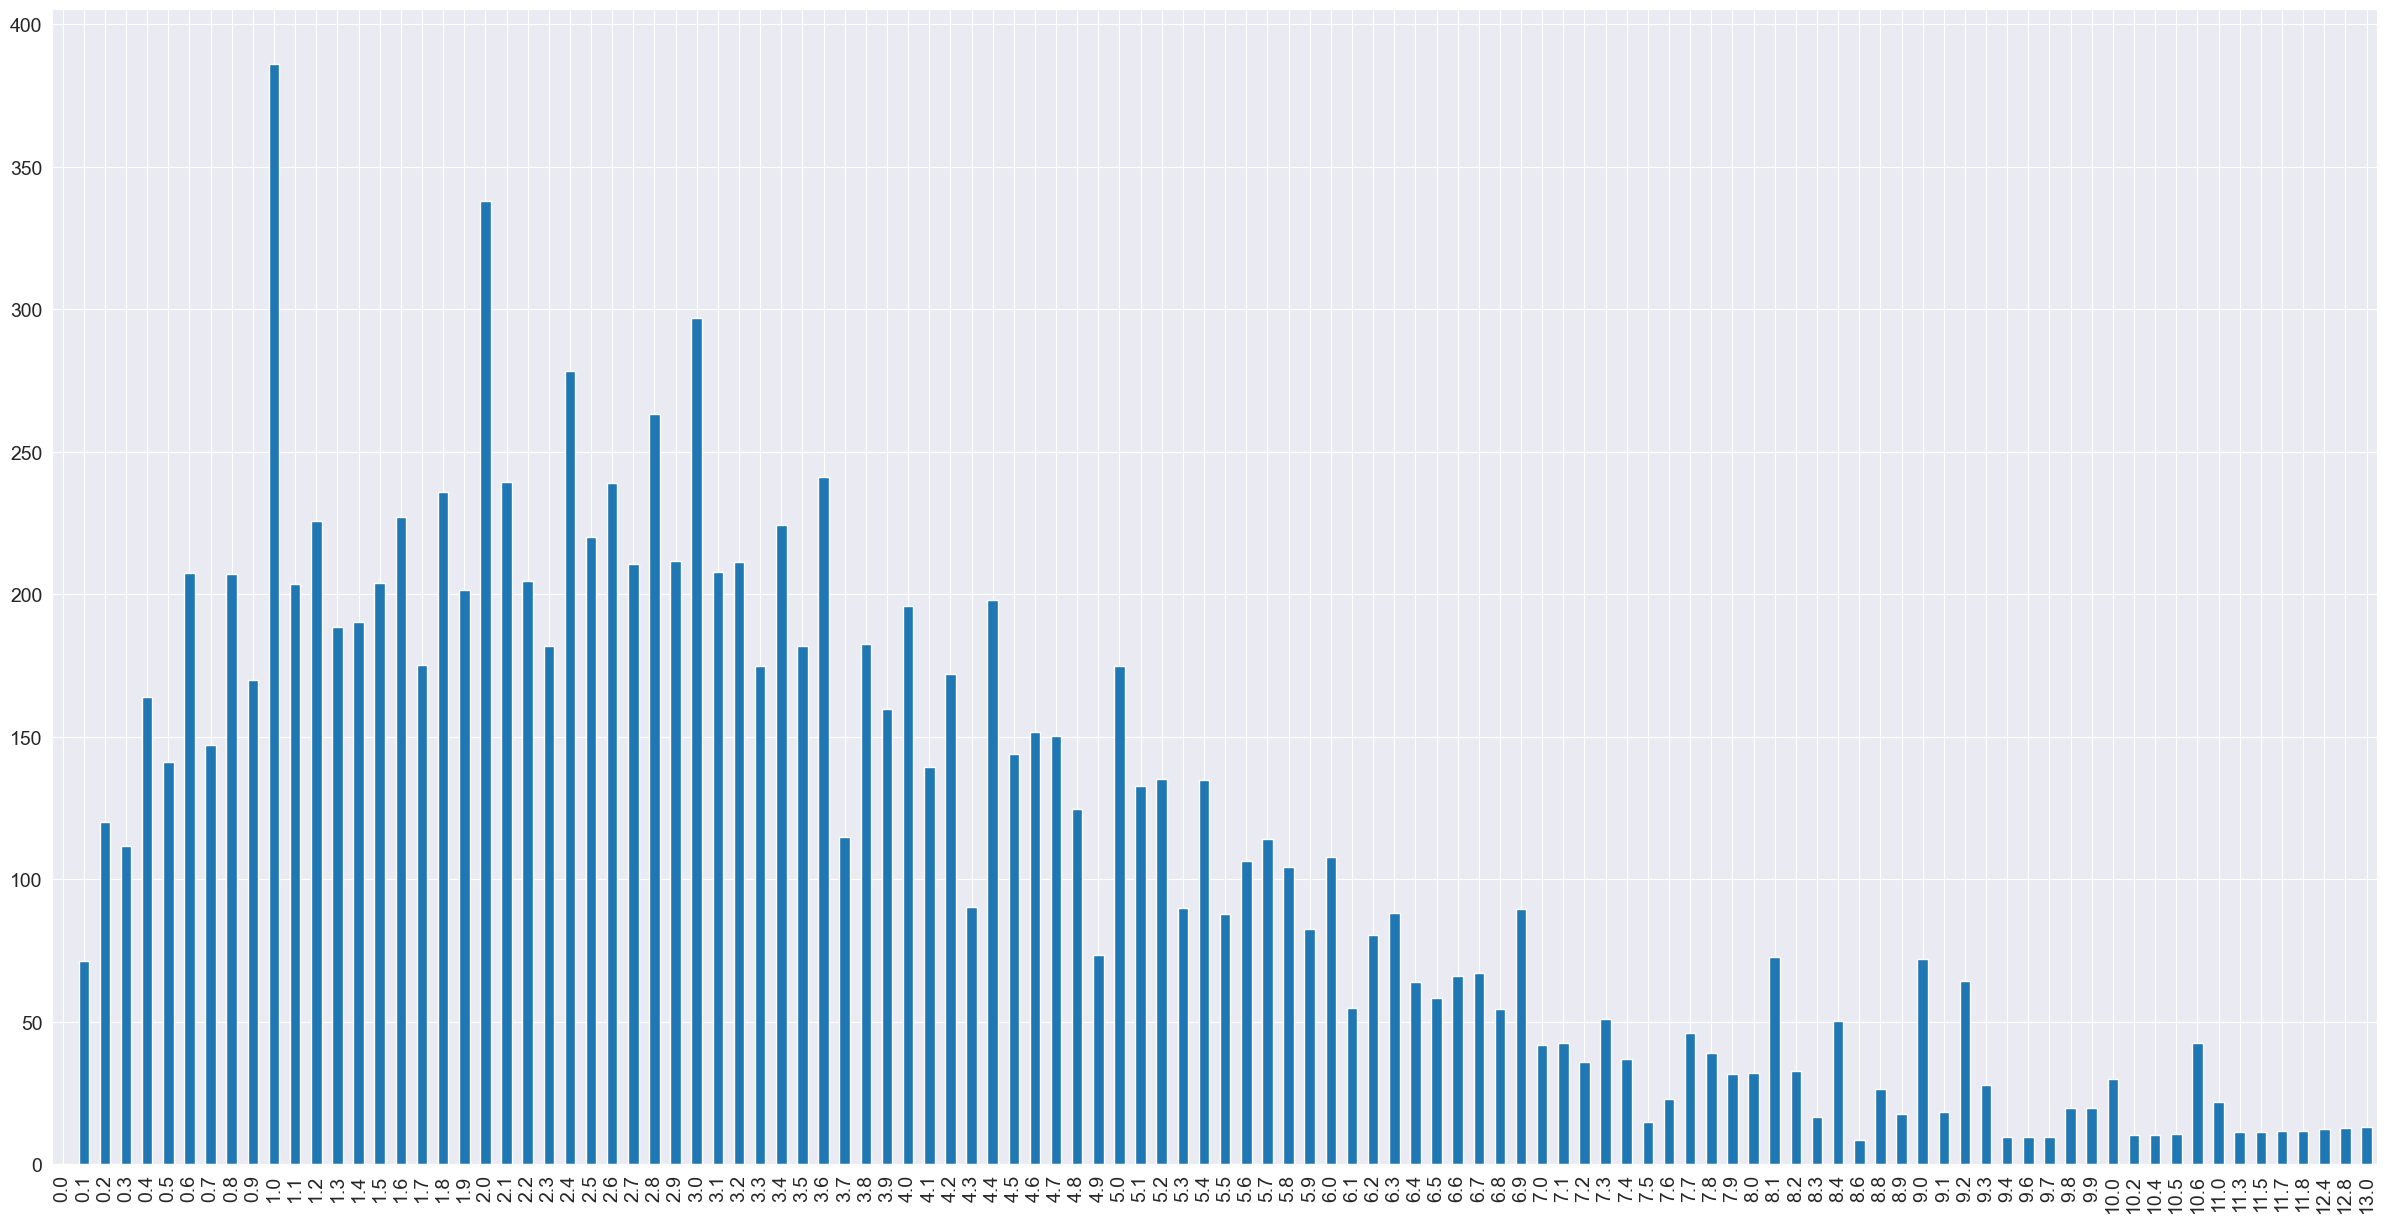

In [12]:
var_numeric = df.select_dtypes("number").isnull().sum()
var_numeric = var_numeric[var_numeric > 0]

for x in var_numeric.index:
    if df[x].nunique() < 120:
        try:
            print("\n\n wykres dla " + str(x) + ": ")
            plt.clf()
            df[x].groupby(df[x].values).sum().plot.bar(figsize=(30, 15), fontsize=14)
            plt.show()
        except:
            print("\t\tbłąd! (pusta kolumna): " + str(x))
            plt.clf()
    else:
        print("\n\n wykres dla " + str(x) + ": ")
        print("za duzo wartosci, zaokraglono do 0,1 \n ")
        plt.clf()
        zfile = round(df[x], 1)
        zfile.groupby(zfile.values).sum().plot.bar(figsize=(30, 15), fontsize=14)
        plt.show()

### Wizualizacja zmiennych kategorycznych: 



 wykres dla host_location: 


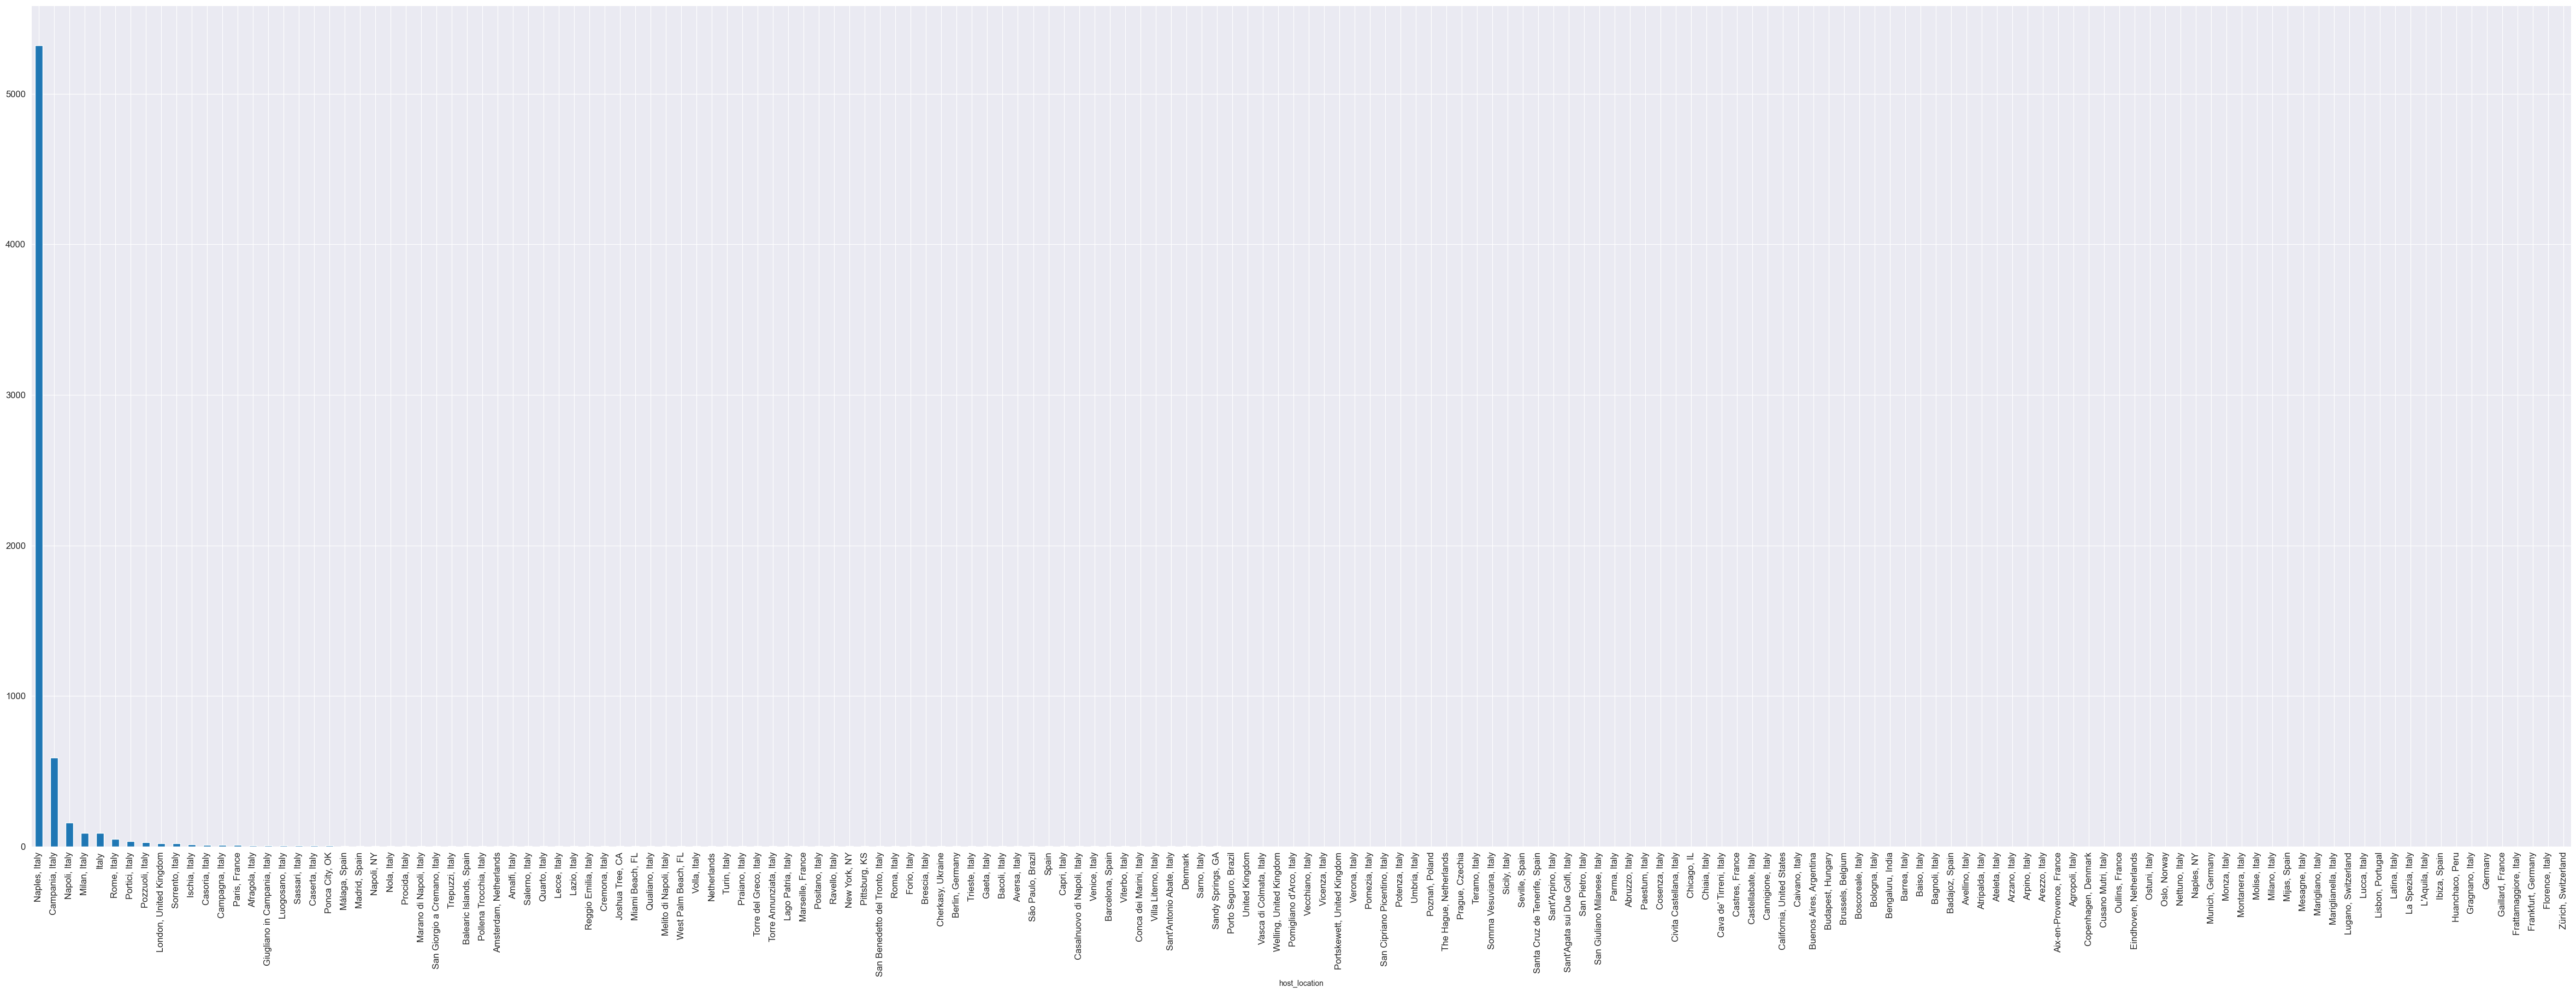



 wykres dla host_response_time: 


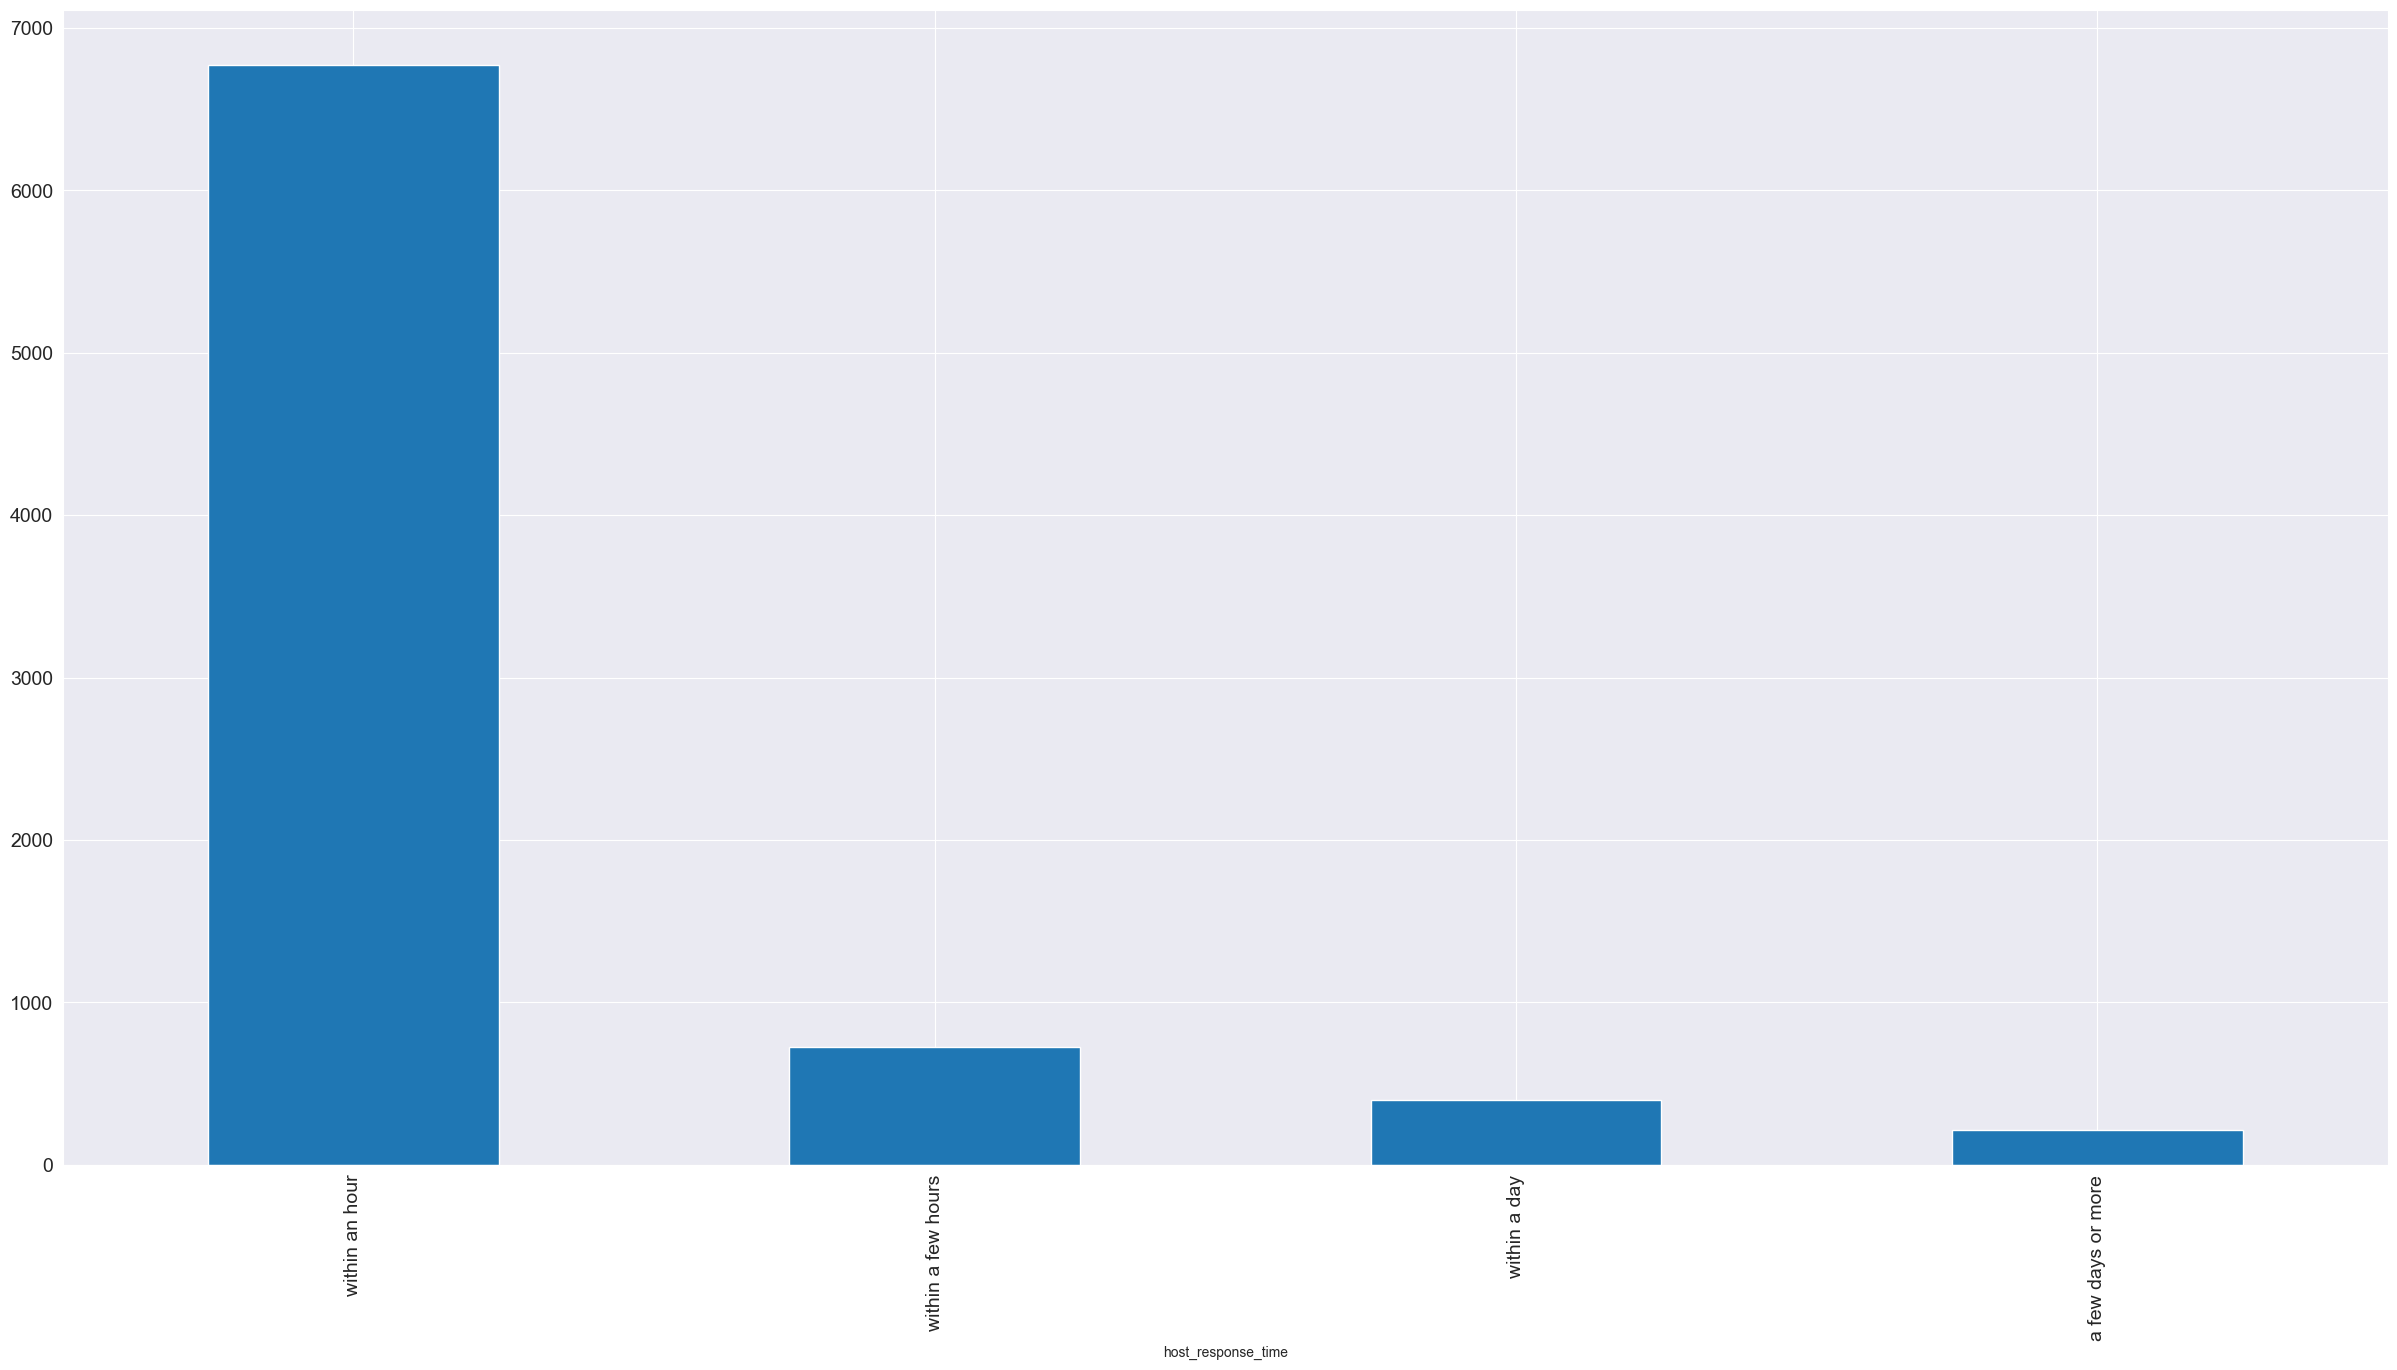



 wykres dla host_neighbourhood: 


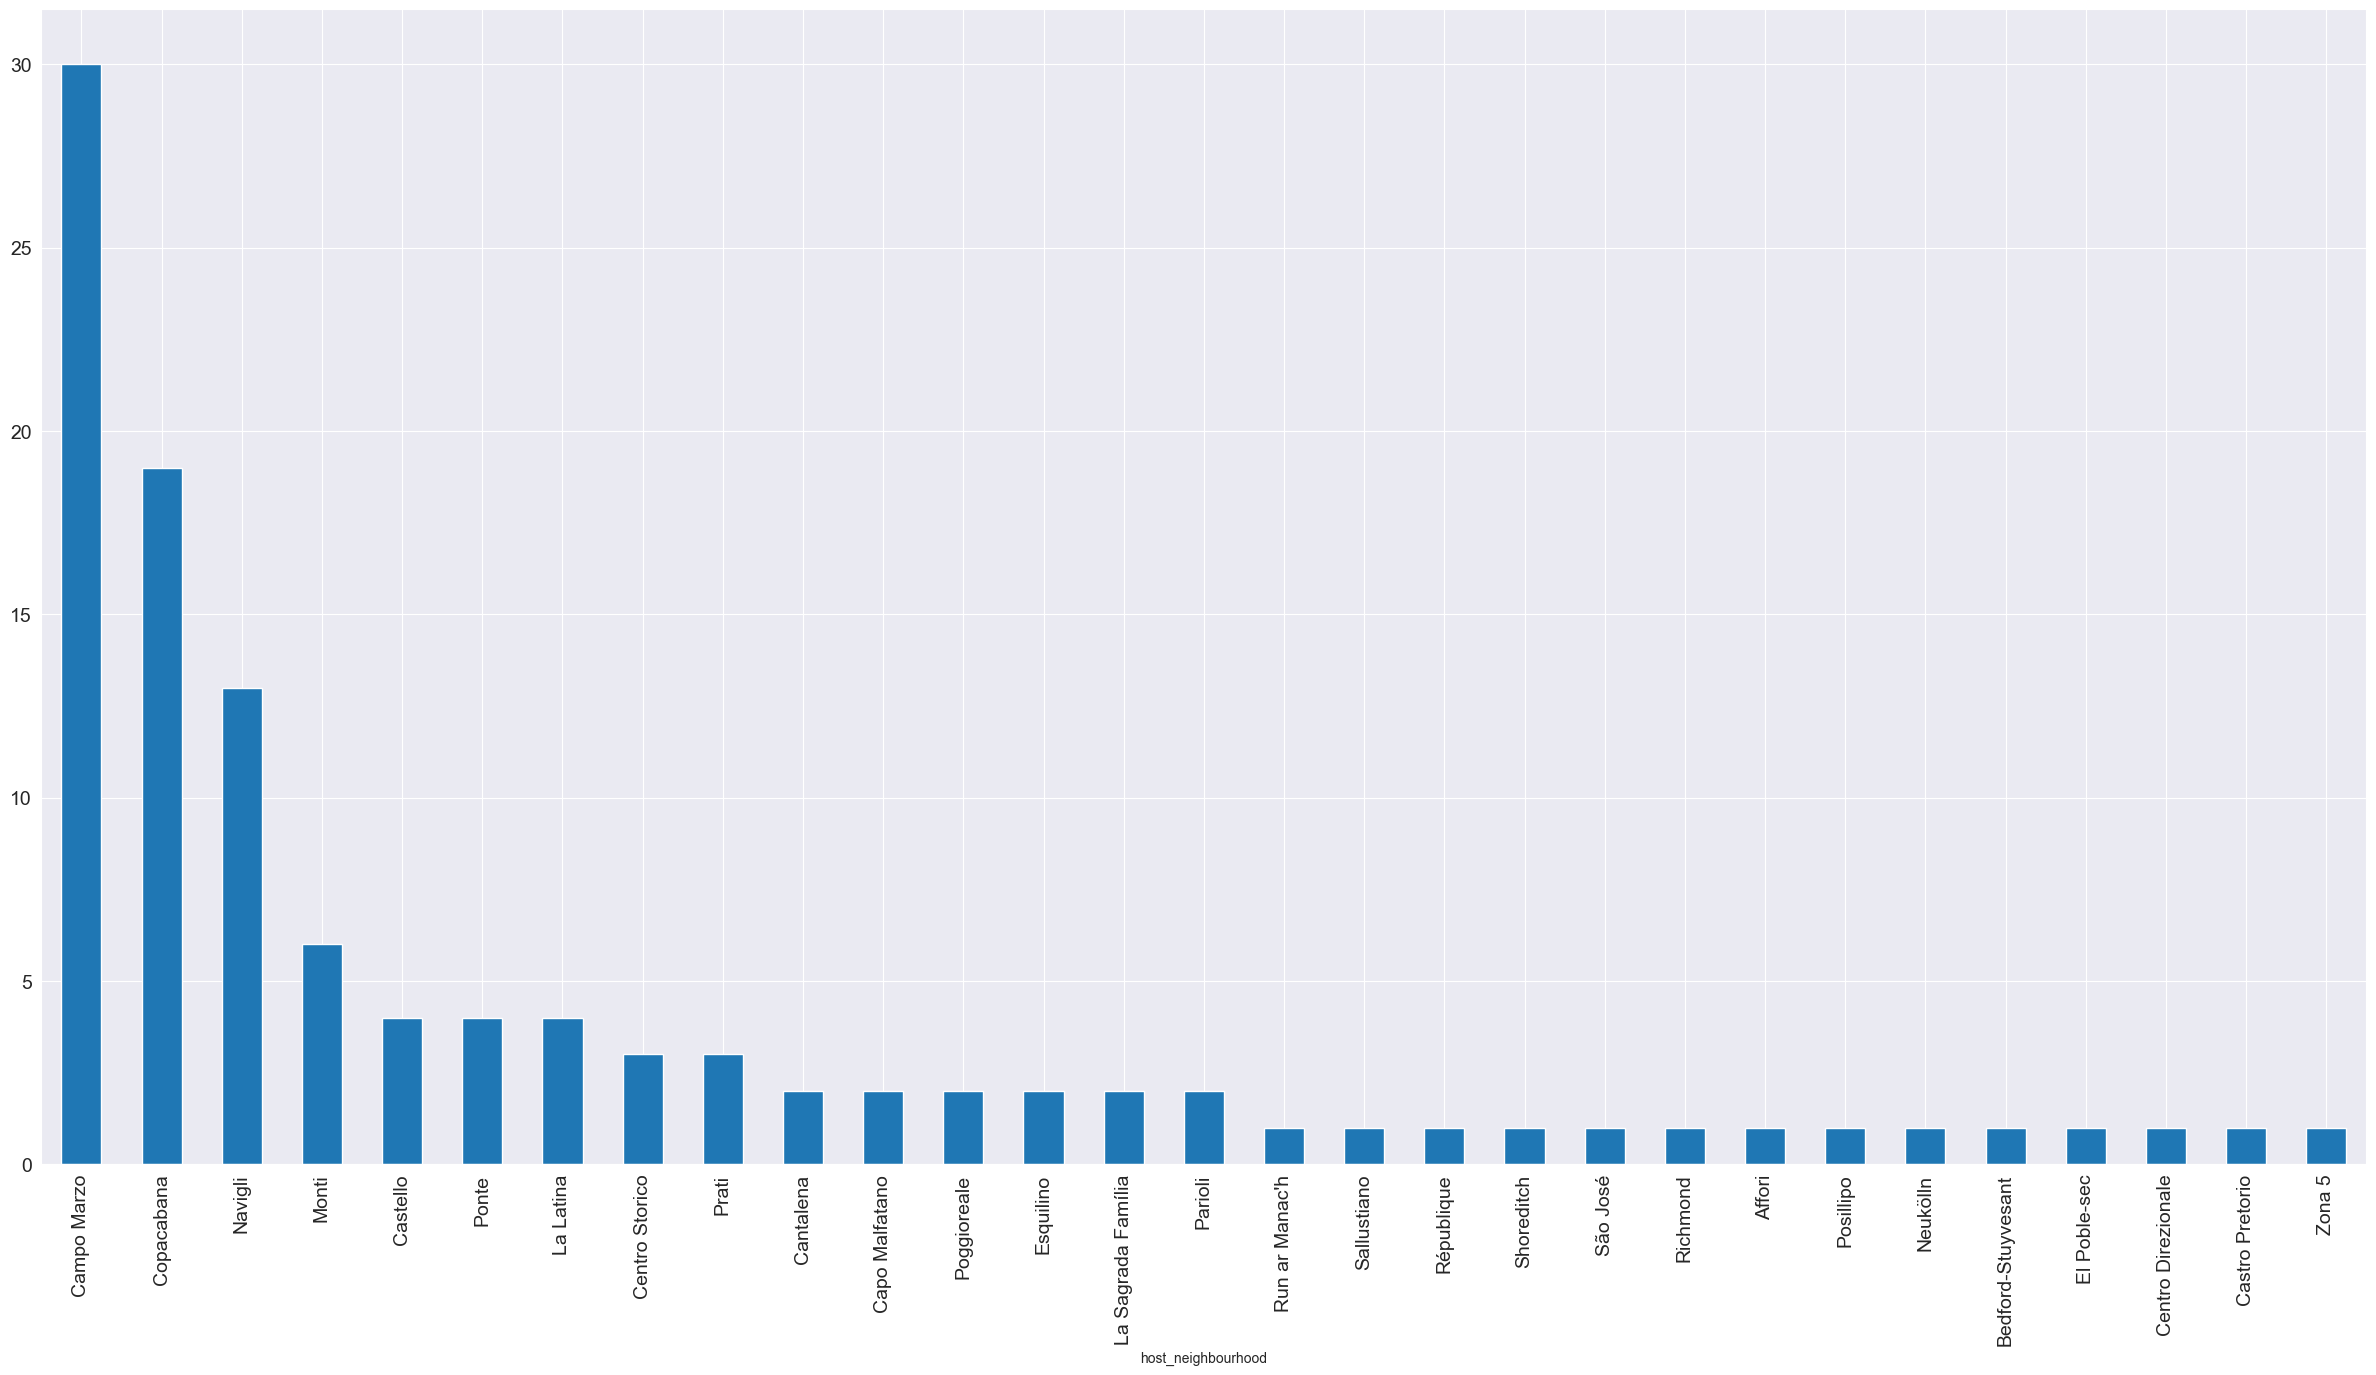



 wykres dla neighbourhood: 


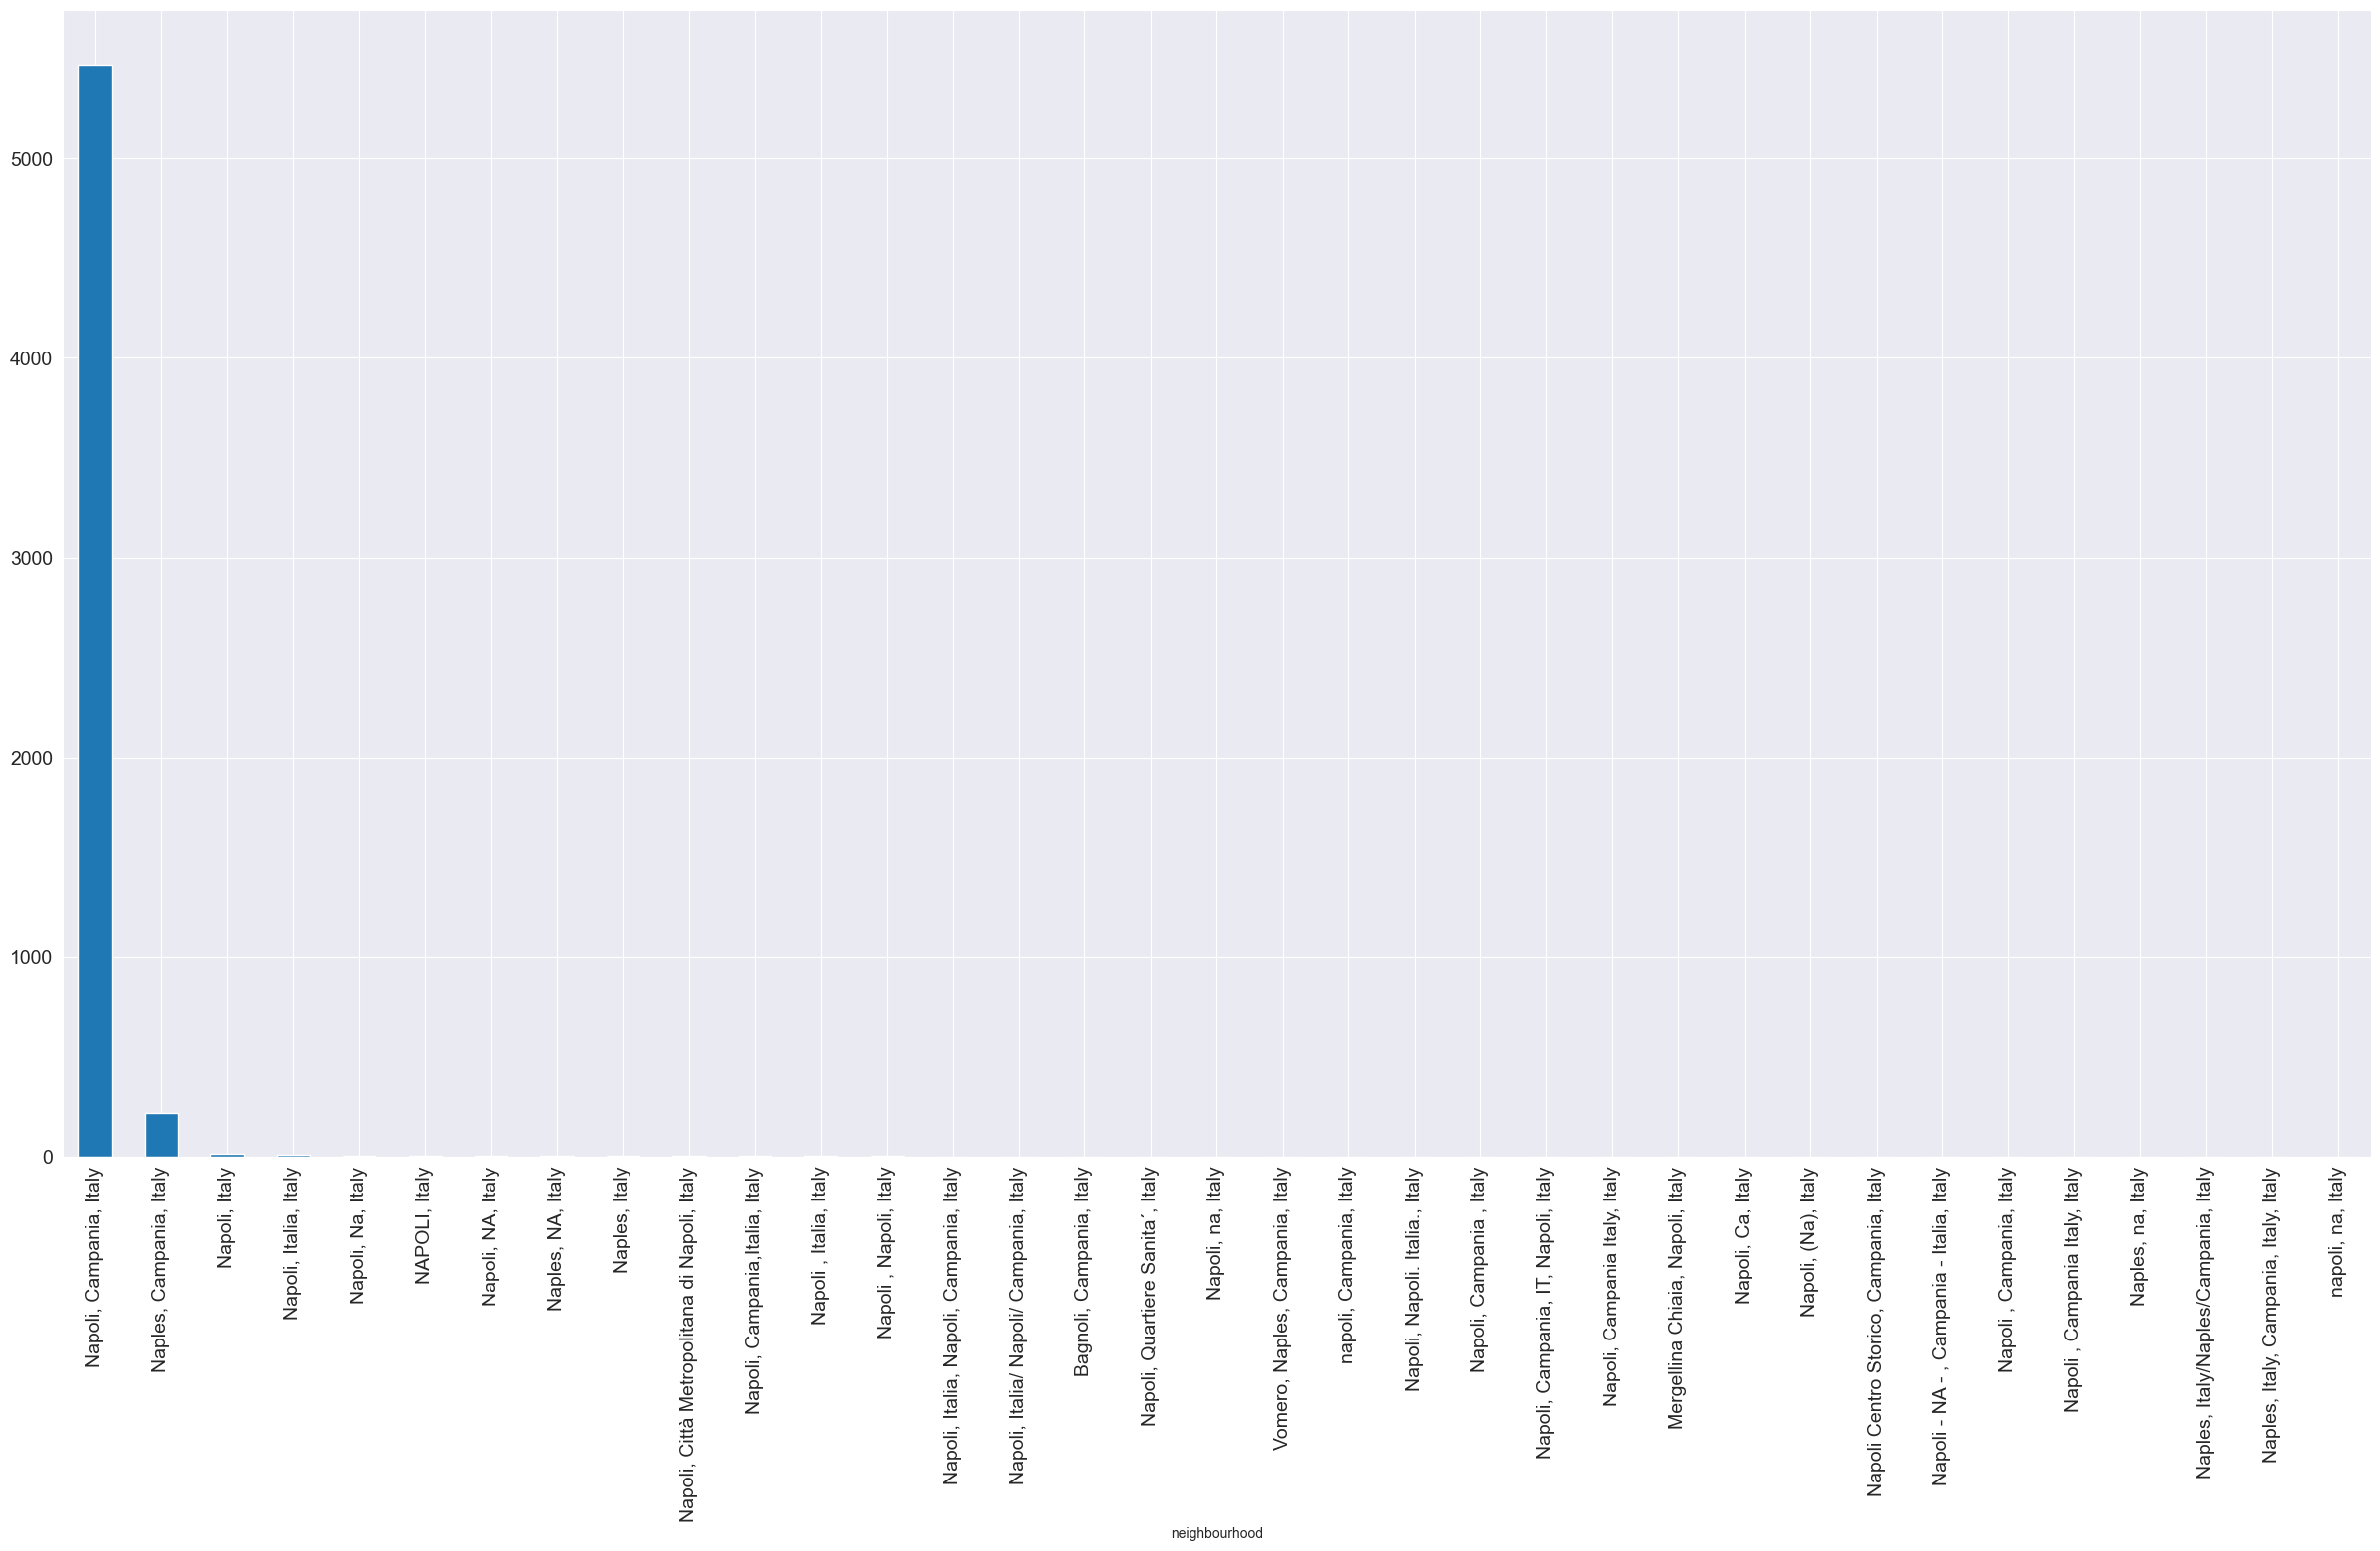

In [13]:
var_categoric = df.select_dtypes("category").isnull().sum()
var_categoric = var_categoric[var_categoric > 0]

for x in var_categoric.index:
    if df[x].nunique() < 120:
        try:
            print("\n\n wykres dla " + str(x) + ": ")
            plt.clf()
            df[x].value_counts().plot.bar(figsize=(30, 15), fontsize=14)
            plt.show()
        except:
            print("\t\tbłąd! (pusta kolumna): " + str(x))
            plt.clf()
    else:
        print("\n\n wykres dla " + str(x) + ": ")
        plt.clf()
        df[x].value_counts().plot.bar(figsize=(60, 20), fontsize=12)
        plt.show()

### Charakteryzacja zmiennych:

In [14]:
from scipy.stats import skew, kurtosis

# wybrane zmienne numeryczne
zmienne_numeryczne = ['bathrooms', 'bedrooms', 'beds', 'price']

# charakteryzacja zmiennych numerycznych
for it in zmienne_numeryczne:
    print(f'{it}:')
    print(f' Skośność: {skew(df[it]):.2f}')
    print(f' Kurtoza: {kurtosis(df[it]):.2f}')

bathrooms:
 Skośność: nan
 Kurtoza: nan
bedrooms:
 Skośność: nan
 Kurtoza: nan
beds:
 Skośność: nan
 Kurtoza: nan
price:
 Skośność: 25.19
 Kurtoza: 1082.68


### Krok 8 - Czyszczenie danych
Uzupełnienie brakujących danych (numeryczne – wartością średnią, kategoryczne – interpolacja)

In [15]:
# wartosci numeryczne – uzupelnienie wartoscia srednia
for x in var_numeric.index:
    df[x].fillna((df[x].mean()), inplace=True)

# wartosci kategoryczne – interpolacja
for x in var_categoric.index:
    df[x] = df[x].interpolate(method='pad')

# usuwanie pustych kolumn
df.dropna(how='all', axis='columns', inplace=True)

/var/folders/z4/rzs7s3093r965xv9kcjr15pw0000gn/T/ipykernel_8942/2570207053.py:7: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[x] = df[x].interpolate(method='pad')


### Krok 9 - Zbadanie zależności pomiędzy zmiennymi
### Obliczenie macierzy korelacji za pomocą współczynnika Pearsona

In [16]:
cor_numeric = df.select_dtypes("number")
correlations = cor_numeric.corr(method='pearson', min_periods=1)
correlations

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.488906,0.049143,0.066190,0.096096,0.068612,0.043462,0.000361,-0.007148,-0.036135,-0.068007,-0.027706,-0.026865,-0.035643,-0.237830,-0.033296,0.019599,-0.255922,-0.242164,-0.020187,-0.257197,0.246703,0.277079,0.274351,0.217010,-0.354823,-0.164085,0.038947,0.001395,-0.034549,-0.021138,-0.062680,-0.016756,-0.068168,-0.051035,0.138573,0.148772,0.049691,0.042310,0.235569
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.488906,NaN,1.000000,-0.002382,0.035507,-0.070374,-0.067708,0.076104,0.066533,-0.040211,-0.062612,-0.060151,-0.039667,0.000093,-0.045460,-0.096276,-0.043380,0.019916,-0.130905,-0.106752,-0.027375,-0.130038,0.119030,0.148999,0.148192,0.126455,-0.279688,-0.134223,-0.028262,0.001020,-0.013711,0.002318,-0.027908,-0.021935,-0.065129,-0.022250,-0.054939,-0.051666,-0.034207,-0.020426,0.091663
host_response_rate,0.049143,NaN,-0.002382,1.000000,0.382740,0.043502,0.033334,0.013926,0.059259,0.032226,0.013757,-0.025205,0.019225,-0.005920,-0.007708,-0.025561,-0.008414,0.006436,0.049064,0.060934,-0.003079,0.053455,-0.082516,-0.049357,-0.024517,-0.003755,0.098269,0.138815,0.150285,0.047119,0.035558,0.041430,0.039815,0.051903,0.025723,0.034271,0.062957,0.066304,0.021764,0.009323,0.114115
host_acceptance_rate,0.066190,NaN,0.035507,0.382740,1.000000,0.071637,0.048607,0.039804,0.066649,0.052822,-0.030779,-0.036771,0.000596,-0.010670,-0.017925,-0.049558,-0.018461,0.006162,0.105430,0.130725,-0.010753,0.117864,-0.140878,-0.084914,-0.044074,-0.027691,0.163456,0.234595,0.225006,0.051019,0.029183,0.028459,0.020821,0.043799,0.028503,0.034888,0.104775,0.114700,0.014486,0.007180,0.182136
host_listings_count,0.096096,NaN,-0.070374,0.043502,0.071637,1.000000,0.916575,-0.008386,0.001609,0.056805,0.029652,0.015234,0.019852,0.006637,-0.008393,0.002933,-0.005800,0.106630,-0.113102,-0.043887,0.025788,-0.093823,0.055879,0.065568,0.064866,0.070611,-0.055980,-0.029760,-0.007321,-0.113628,-0.119154,-0.151411,-0.100433,-0.100317,-0.065616,-0.130125,0.606553,0.604497,0.413835,0.002396,-0.007890
host_total_listings_count,0.068612,NaN,-0.067708,0.033334,0.048607,0.916575,1.000000,-0.008191,-0.001809,0.050704,0.023259,0.018980,0.024630,0.004304,-0.006313,-0.003660,-0.004553,0.067673,-0.095353,-0.037366,0.015645,-0.083356,0.048827,0.053885,0.051237,0.057237,-0.041024,-0.021132,-0.004811,-0.086158,-0.090589,-0.116908,-0.072168,-0.071055,-0.049685,-0.098856,0.446817,0.445627,0.304771,-0.002025,-0.002449
latitude,0.043462,NaN,0.076104,0.013926,0.039804,-0.008386,-0.008191,1.000000,0.593917,-0.011522,-0.062735,-0.020798,0.003302,-0.068129,-0.002041,-0.004913,-0.002937,-0.006850,0.002433,0.004733,-0.003304,0.002882,-0.012127,0.004644,0.017458,0.037979,0.022238,0.046988,0.052683,-0.030589,-0.013499,-0.005733,-0.036227,-0.019001,-0.184802,-0.024435,-0.021092,-0.029159,0.032898,0.020487,0.078660
longitude,0.000361,NaN,0.066533,0.059259,0.066649,0.001609,-0.001809,0.593917,1.000000,0.010686,-0.040843,-0.025646,0.008249,-0.016364,0.000610,0.015965,-0.000582,-0.002338,0.020653,0.026640,-0.000286,0.024142,-0.072311,-0.043971,-0.

### Zwizualizowanie za pomocą Scatter Plot, Pair Plot i Heat Map

In [ ]:
import seaborn as sns
sns.set()

plt.figure(figsize=(25,25))
sns.scatterplot(correlations, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Scatter Plot')
plt.show()

plt.figure(figsize=(10,10))
sns.pairplot(correlations)
plt.title('Pair Plot')
plt.show()

plt.figure(figsize=(50,50))
sns.heatmap(correlations, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.title('Heat Map')
plt.show()